<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/dc_neural_analysis_schooling_populations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#load packages
!pip install pynrrd
!pip install scikit-posthocs

import os
import csv
import numpy as np
import pandas as pd
import math
import time
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import nrrd
import scipy
from scipy import io
from scipy.fftpack import rfft, irfft, fftfreq
import scipy.stats as stats
import statsmodels
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans, AgglomerativeClustering
import random
from random import randrange
from random import shuffle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import scikit_posthocs as sp
%matplotlib inline
sns.set_style("white")


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def running_mean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

def norm(inputs):
    output = (inputs-min(inputs))/(max(inputs)-min(inputs))
    return output

def baseline_subtraction(angle, window):
    new=[]
    for ndx,i in enumerate(angle):
        if ndx<window/2 or ndx>len(angle)-window/2:
            new.append(0)
        else:
            baseline=np.median(angle[ndx-int(window/2):ndx+int(window/2)])
            new.append(i-baseline)
    return new

def resized(data,N):
    old_indices = np.linspace(0, len(data) - 1, len(data))
    new_indices = np.linspace(0, len(data) - 1, N)
    res = np.interp(new_indices, old_indices, data)
    return res

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set(font_scale=3)
sns.set_style("white")

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/Neural_activity/'

print('loaded')

print("S1 = horizontal object stimulus")
print("S2 = vertical object stimulus")
print("S3 = circle object stimulus")
print("S4 = floor drift stimulus")

Mounted at /content/drive/
loaded
S1 = horizontal object stimulus
S2 = vertical object stimulus
S3 = circle object stimulus
S4 = floor drift stimulus


0.13753940605275758
DZ-230518_wk2_f1_z-130_schooling (112, 4054)
PCA within brain region DZ-230518_wk2_f1_z-130_schooling


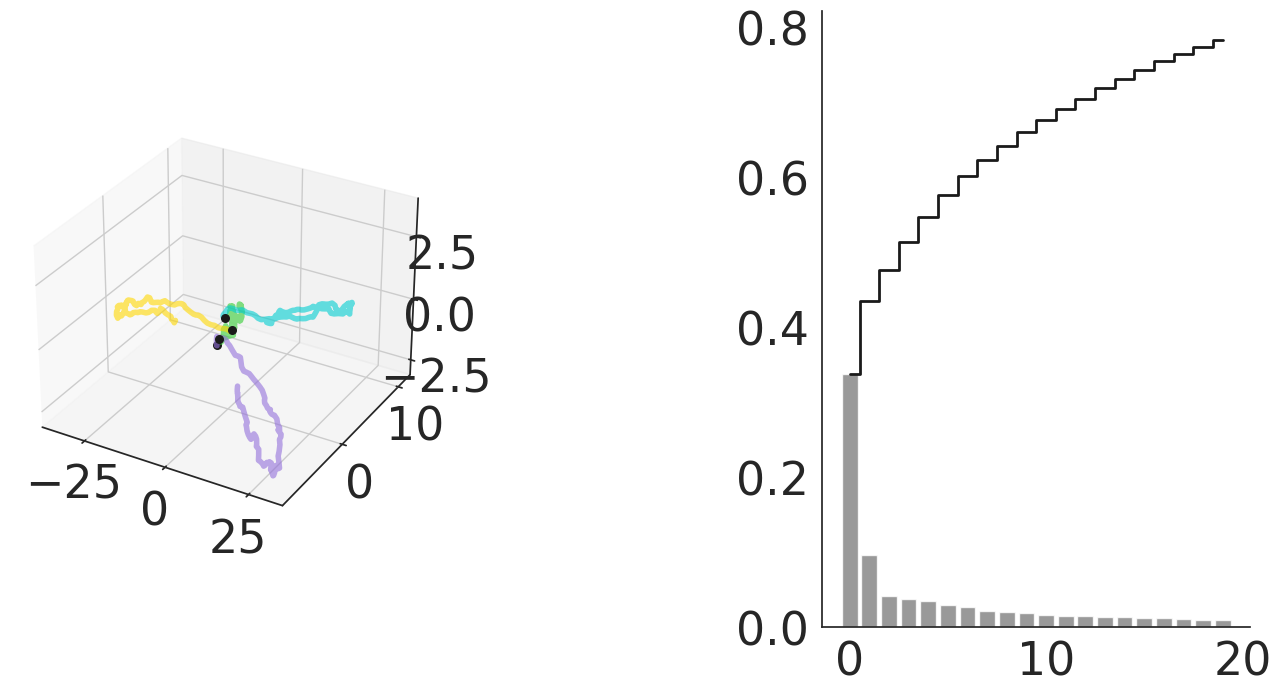

0.09946989109962996
DZ-230605-f3-100_2wk_schooling (11, 4095)
PCA within brain region DZ-230605-f3-100_2wk_schooling


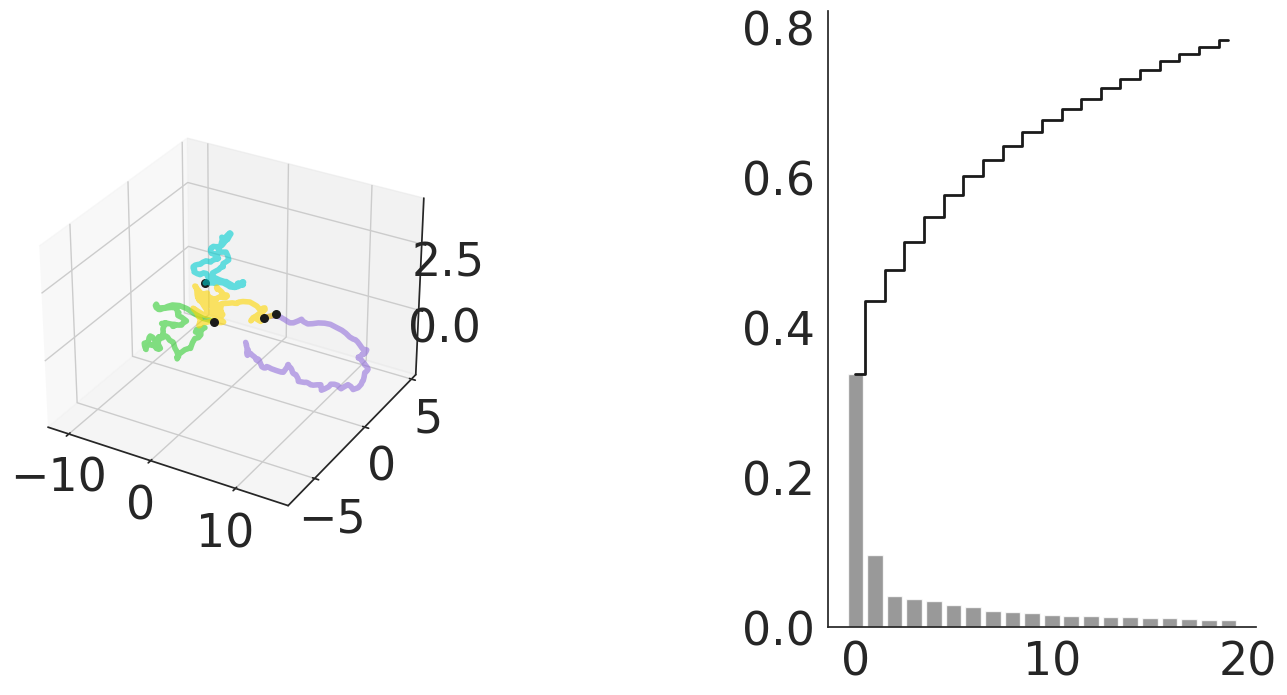

0.05969489771105164
DZ-230605-f5-90_2wk_schooling (0,)
PCA within brain region DZ-230605-f5-90_2wk_schooling


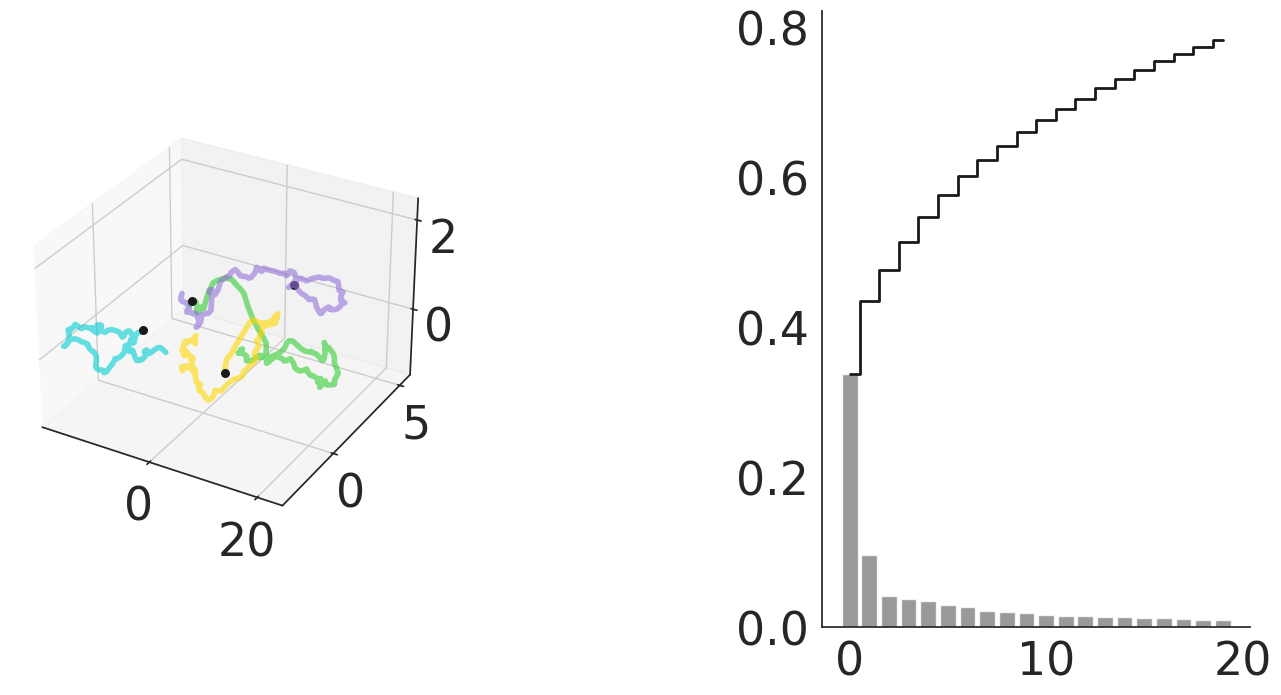

0.11254094290858928
ml-230427-f4_schooling-3 (30, 3474)
PCA within brain region ml-230427-f4_schooling-3


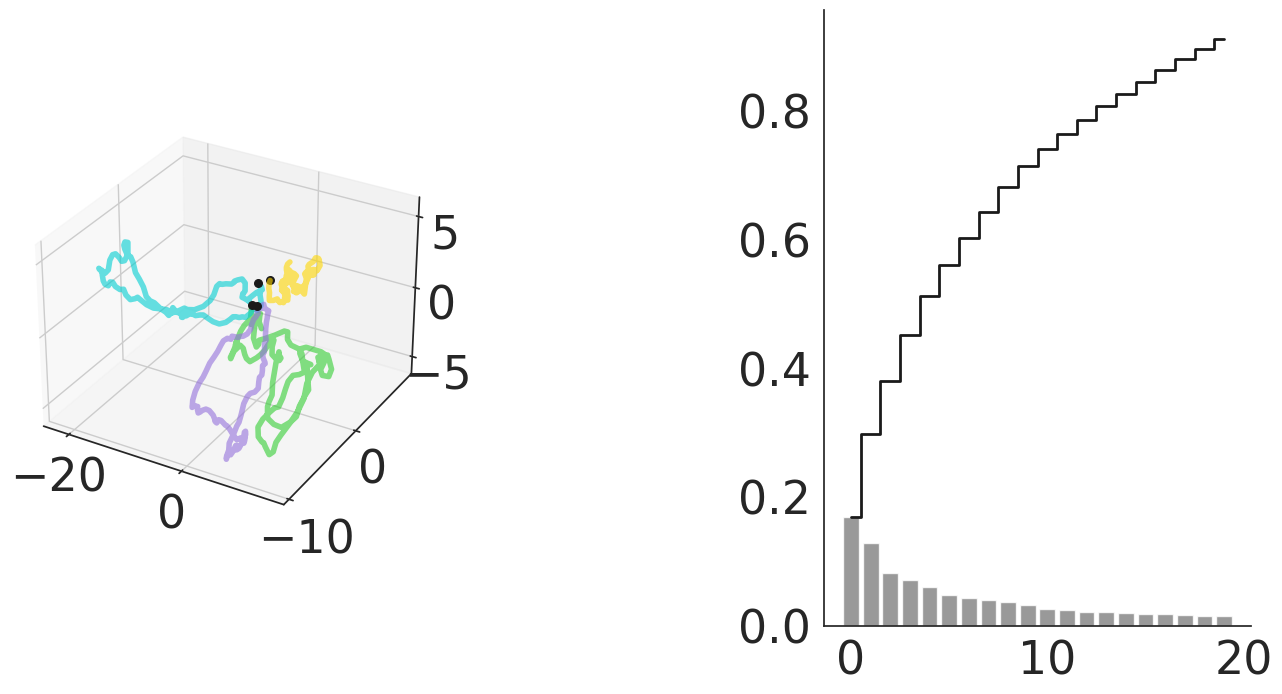

0.11653333618166799
DZ-230517_wk2_f2-2_schooling (66, 4054)
PCA within brain region DZ-230517_wk2_f2-2_schooling


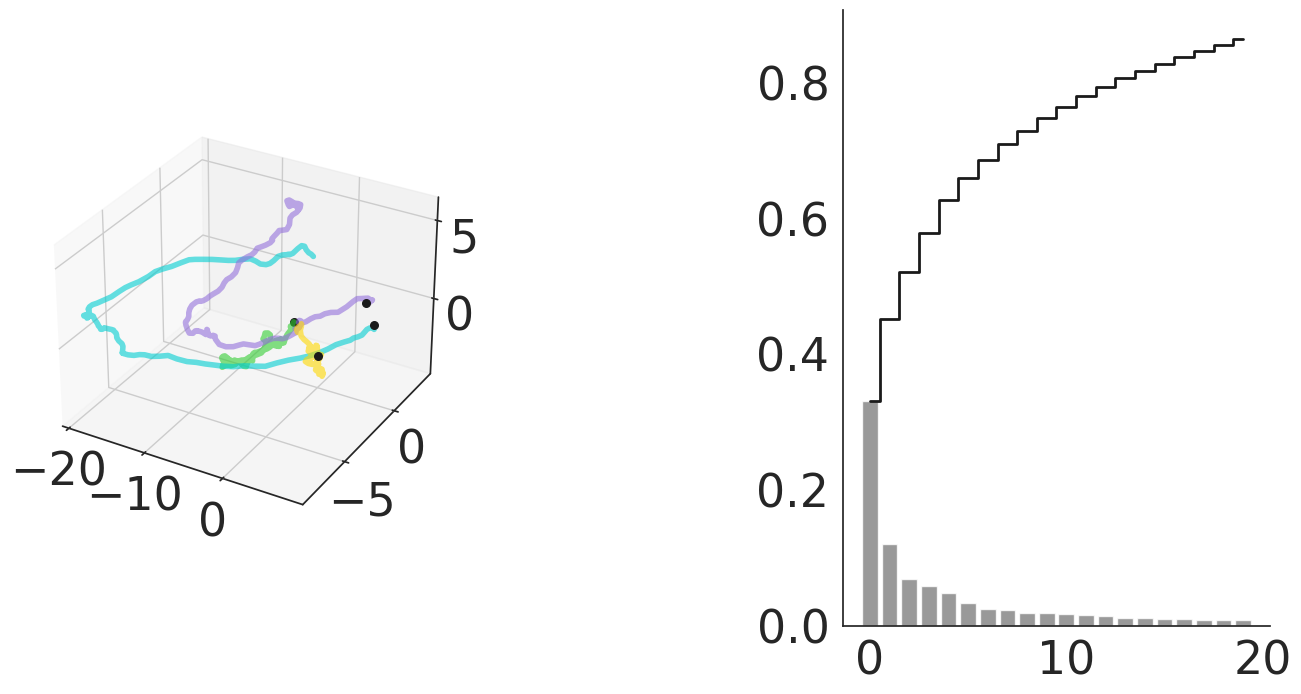

0.07958955192537981
DZ-230518_wk2_f2-170_schooling (8, 4054)
PCA within brain region DZ-230518_wk2_f2-170_schooling


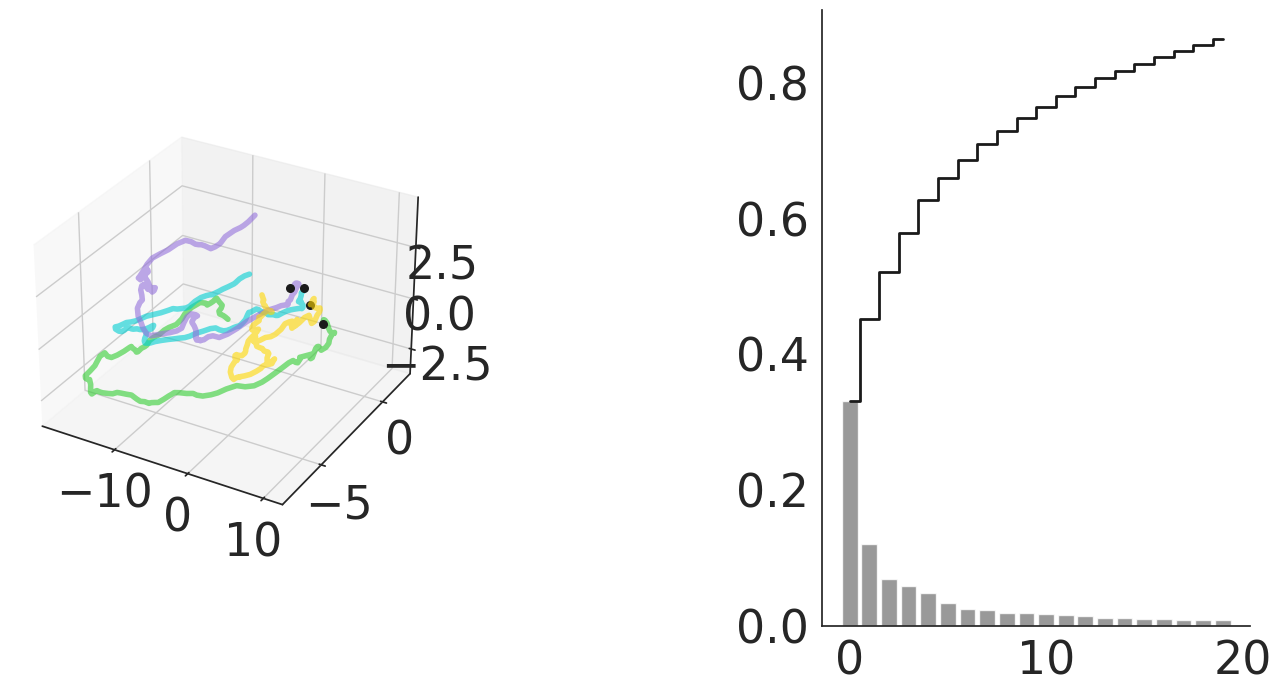

0.1333142088850004
DZ-230503_wk4_f1_schooling (83, 4095)
PCA within brain region DZ-230503_wk4_f1_schooling


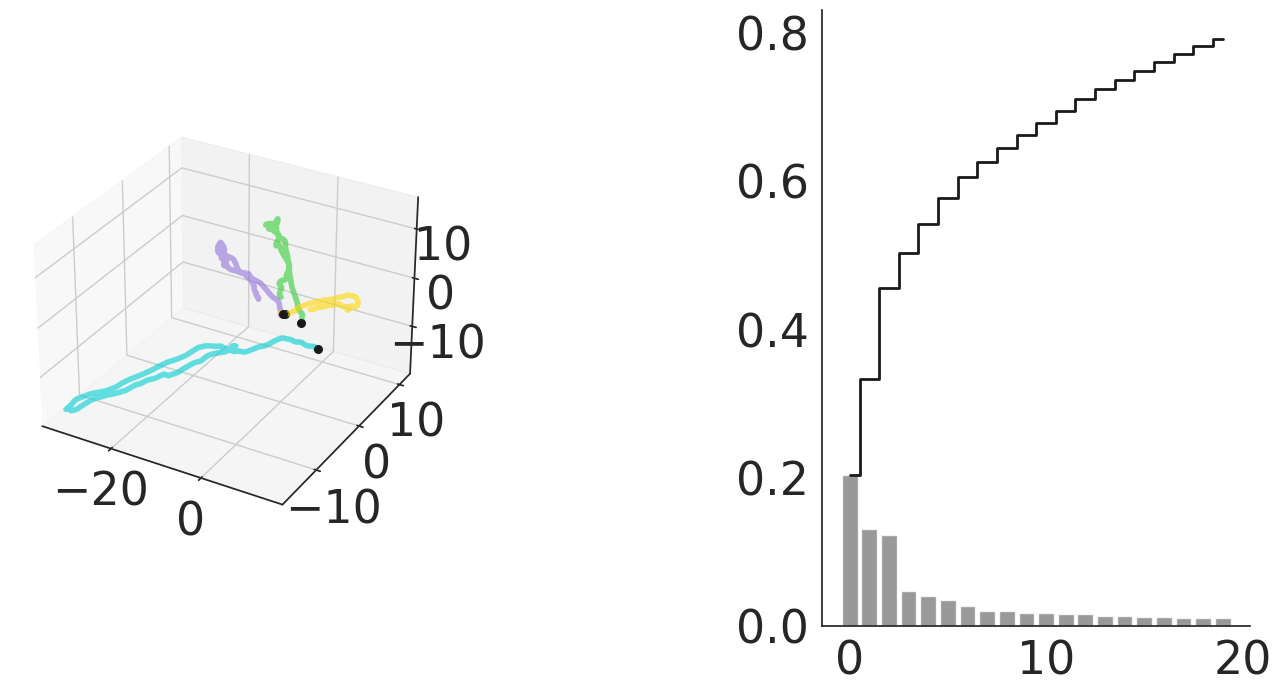

0.07016744498729825
DZ-230519_wk4_f1-2_schooling (5, 4095)
PCA within brain region DZ-230519_wk4_f1-2_schooling


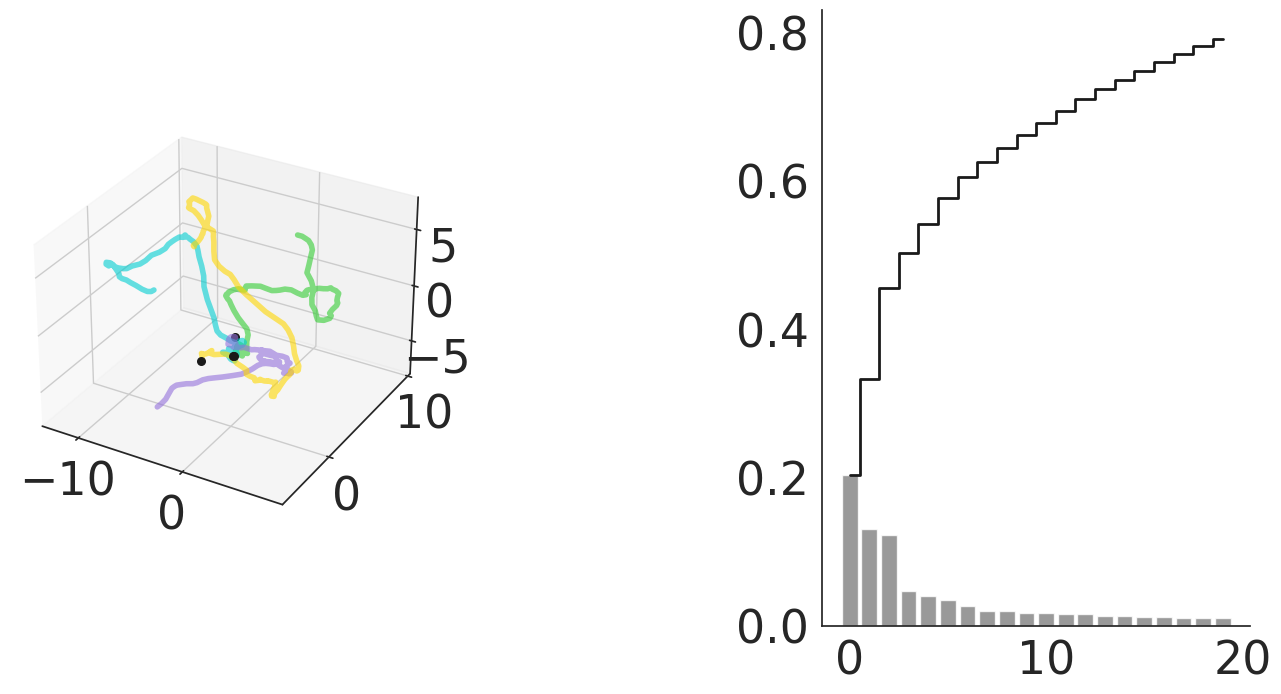

0.1545534498864723
DZ-230523_wk4_f2_-140_schooling (268, 4095)
PCA within brain region DZ-230523_wk4_f2_-140_schooling


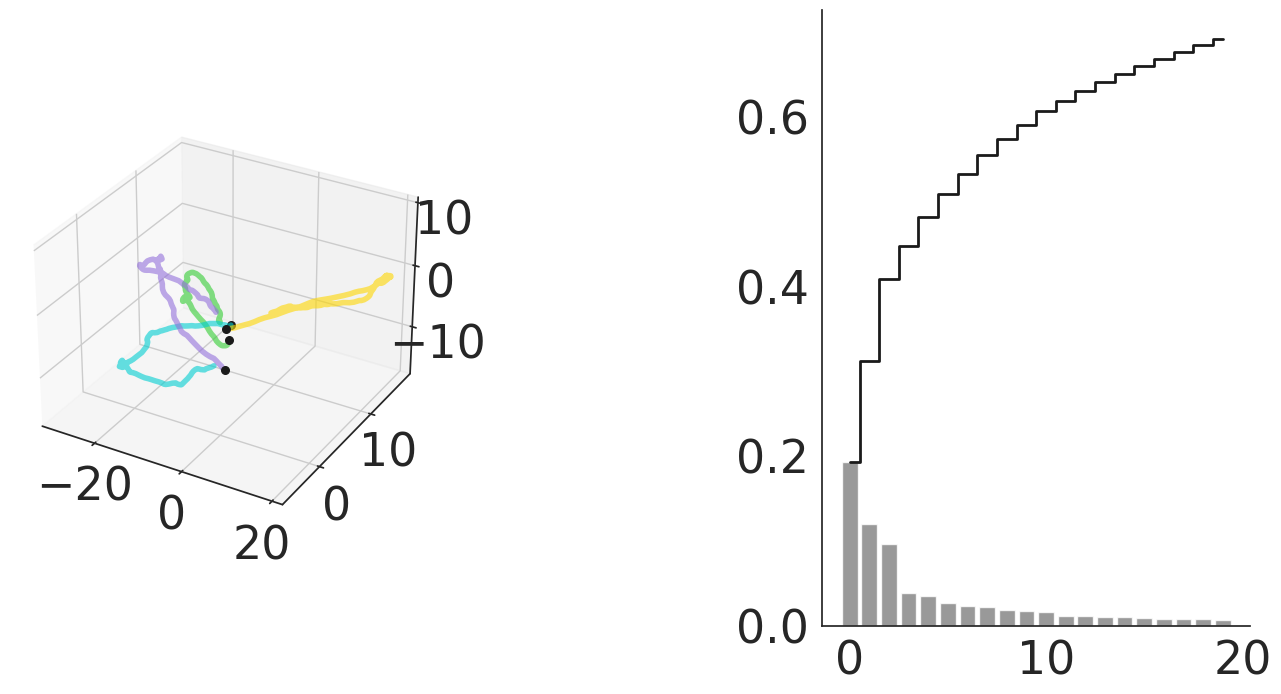

0.12721377693795674
DZ-230427_wk4_f1_schooling (41, 4095)
PCA within brain region DZ-230427_wk4_f1_schooling


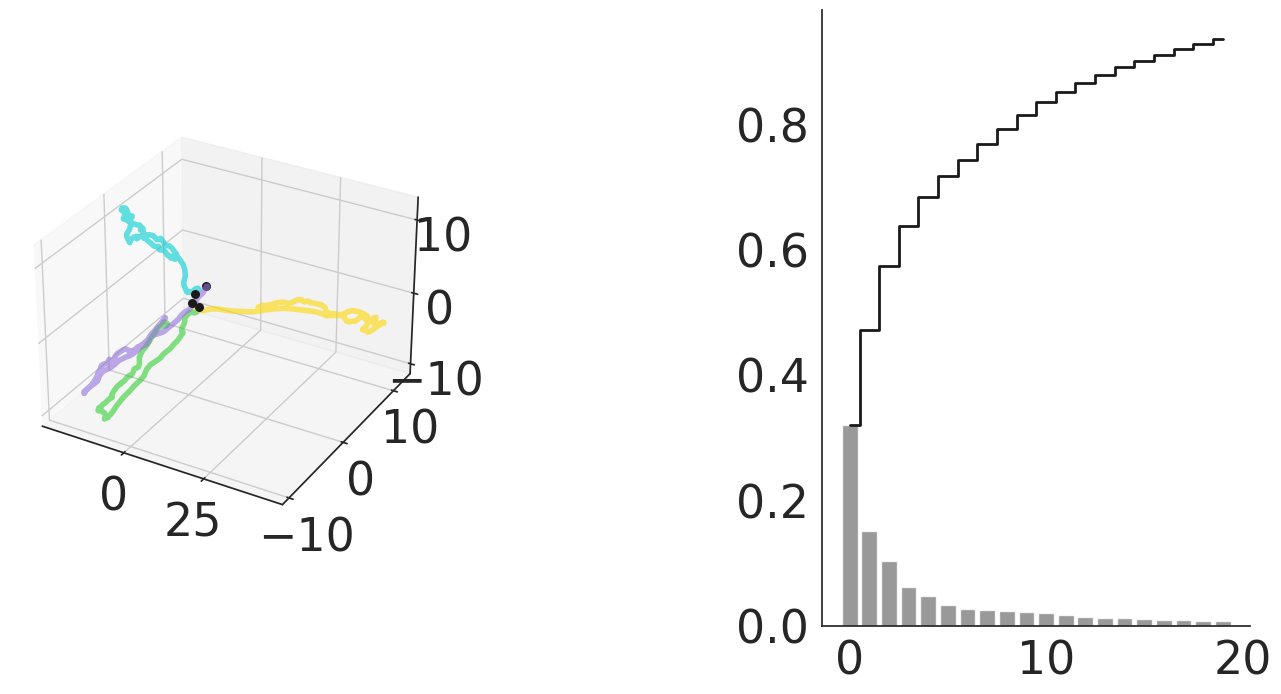

0.11020153402776399
DZ-230522-f2-120_4wk_schooling (105, 4095)
PCA within brain region DZ-230522-f2-120_4wk_schooling


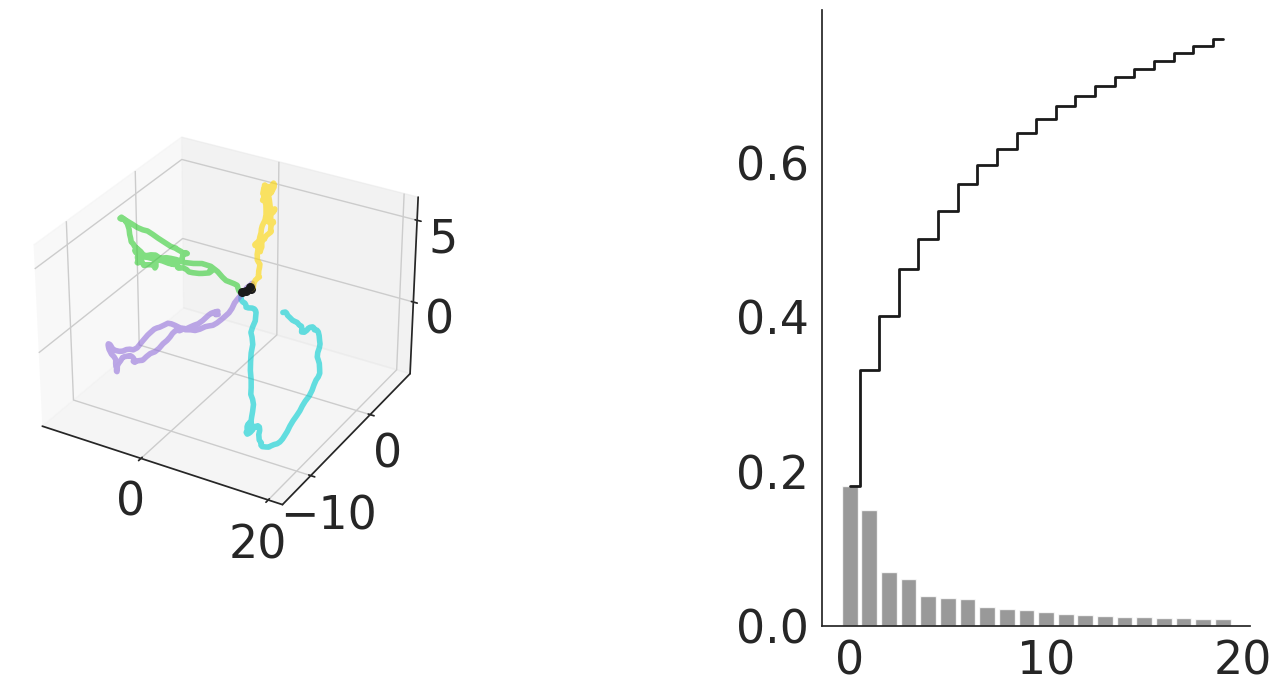

0.09293307064616559
DZ-230523_wk4_f1_-110_schooling (87, 4095)
PCA within brain region DZ-230523_wk4_f1_-110_schooling


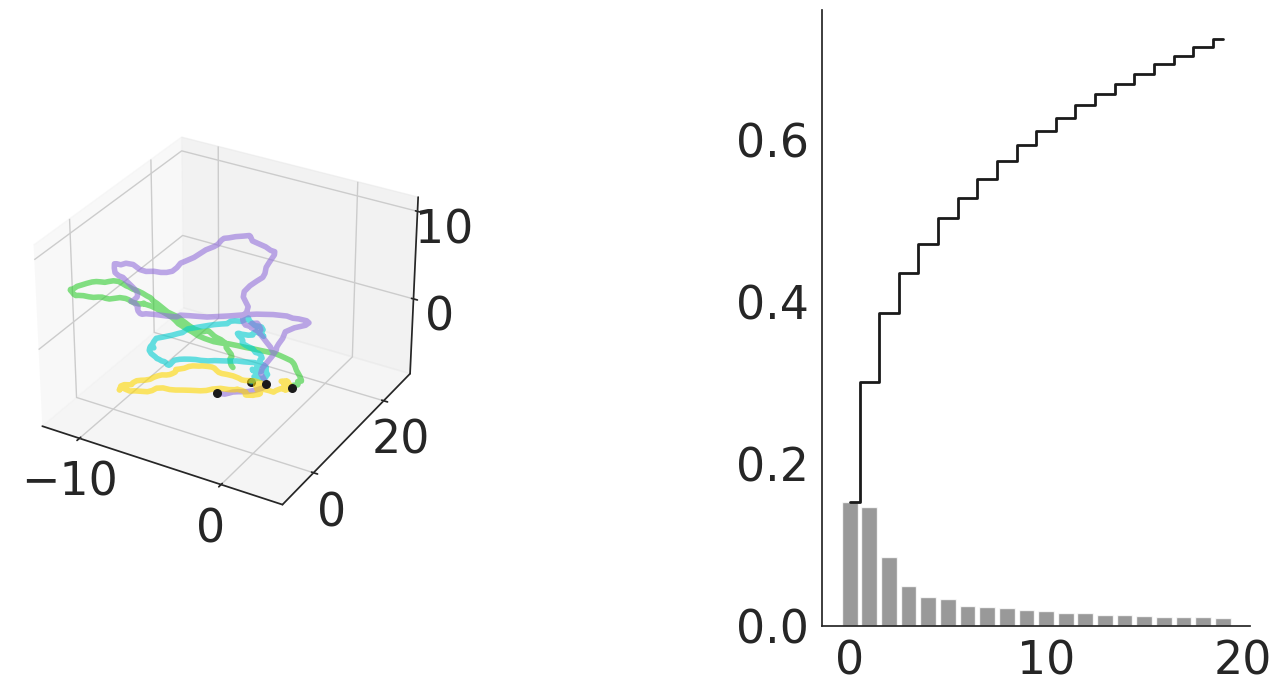

0.06910387977294094
DZ-230523_wk4_f4_-90_schooling (58, 4095)
PCA within brain region DZ-230523_wk4_f4_-90_schooling


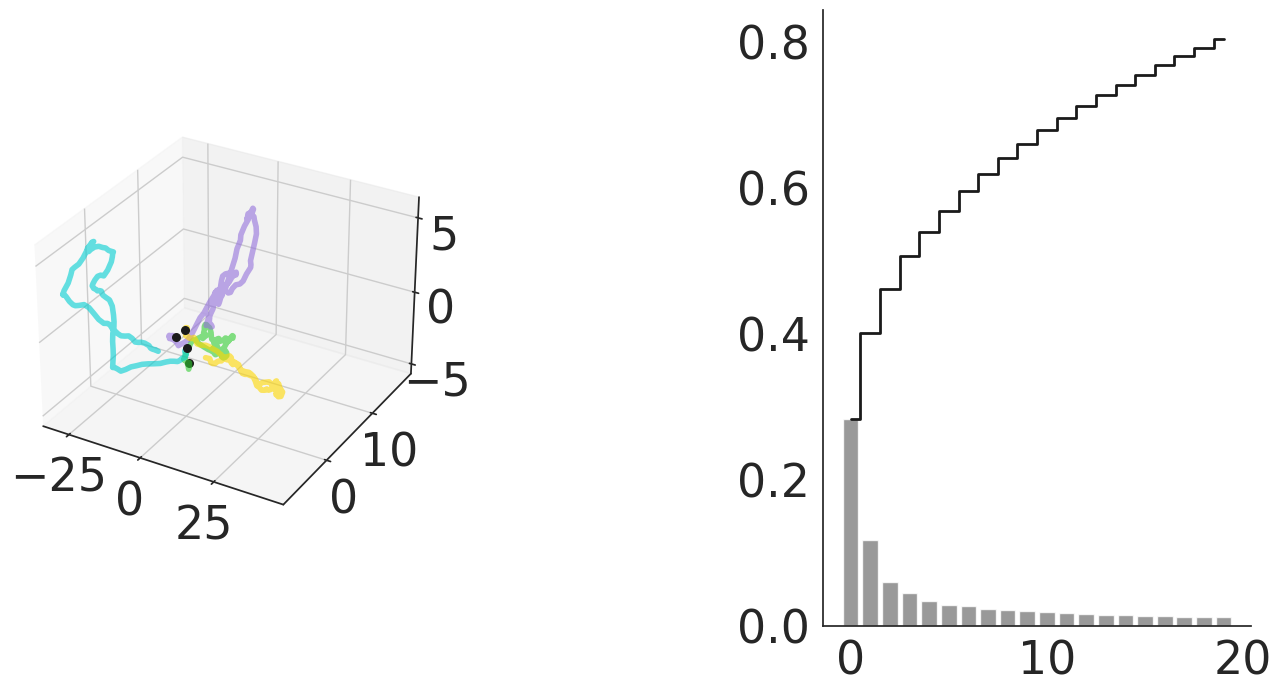

0.12241777888570804
DZ-230522_wk6_f3_schooling (38, 4095)
PCA within brain region DZ-230522_wk6_f3_schooling


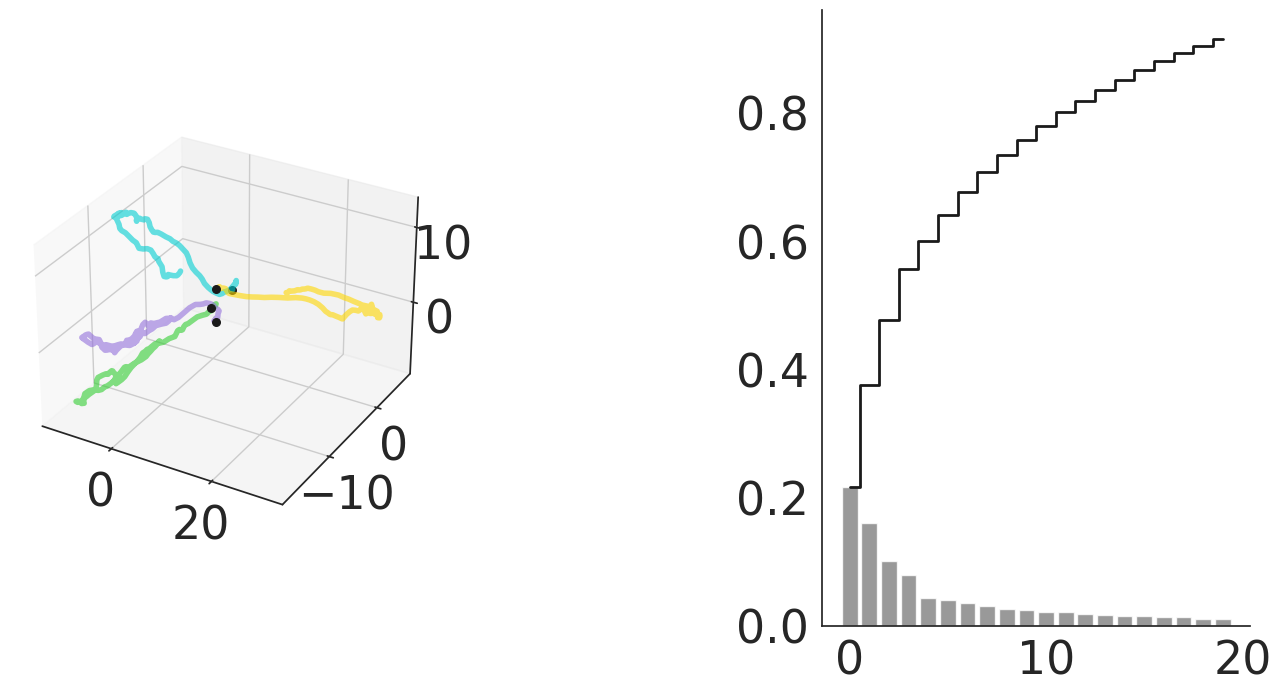

0.21098306131283365
DZ-230522_wk6_f2_schooling (138, 4095)
PCA within brain region DZ-230522_wk6_f2_schooling


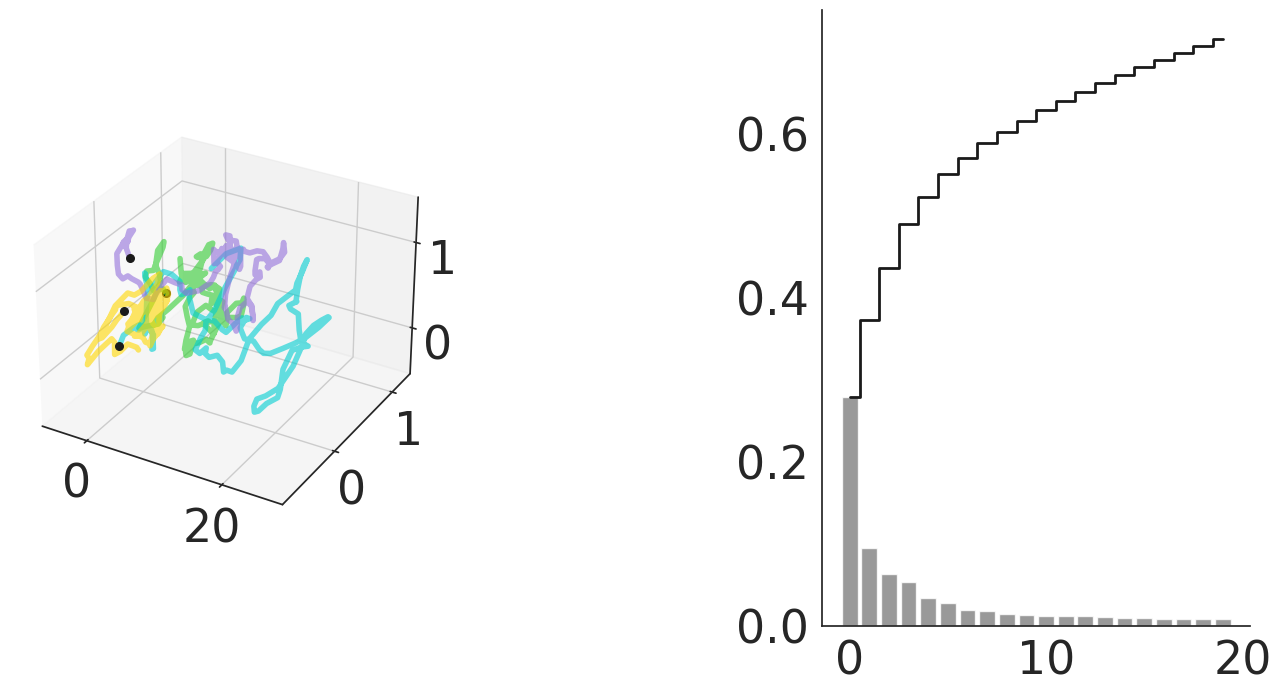

0.1762475433788111
DZ-230521_wk6_f4_schooling (266, 4095)
PCA within brain region DZ-230521_wk6_f4_schooling


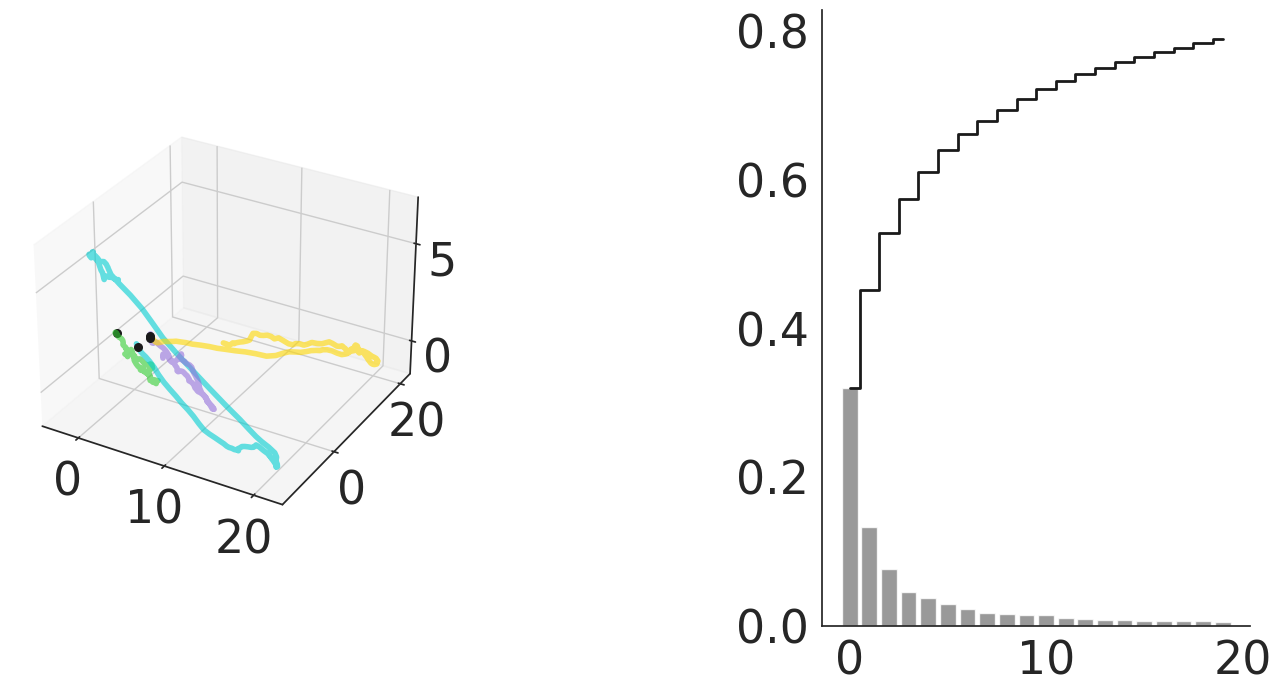

0.13697962485853846
DZ-230529_wk6_f1_-160_schooling (209, 4095)
PCA within brain region DZ-230529_wk6_f1_-160_schooling


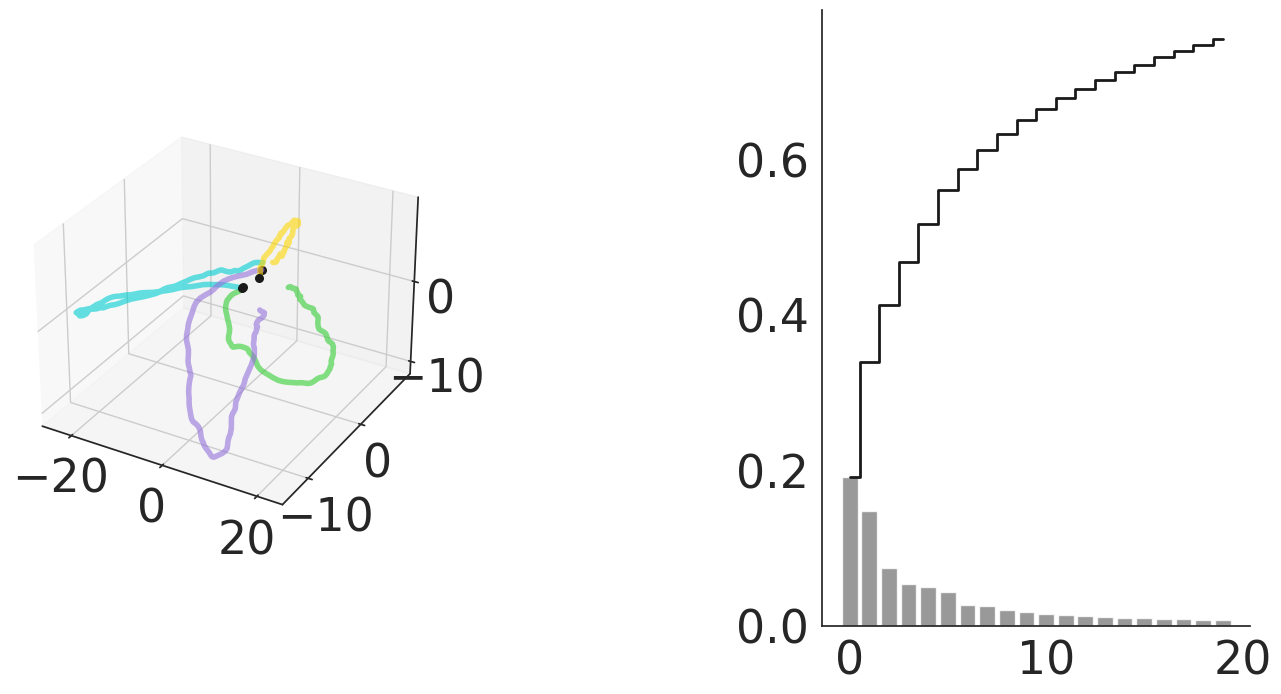

0.07315412207262315
DZ-230524_wk6_f1-3_schooling (31, 4095)
PCA within brain region DZ-230524_wk6_f1-3_schooling


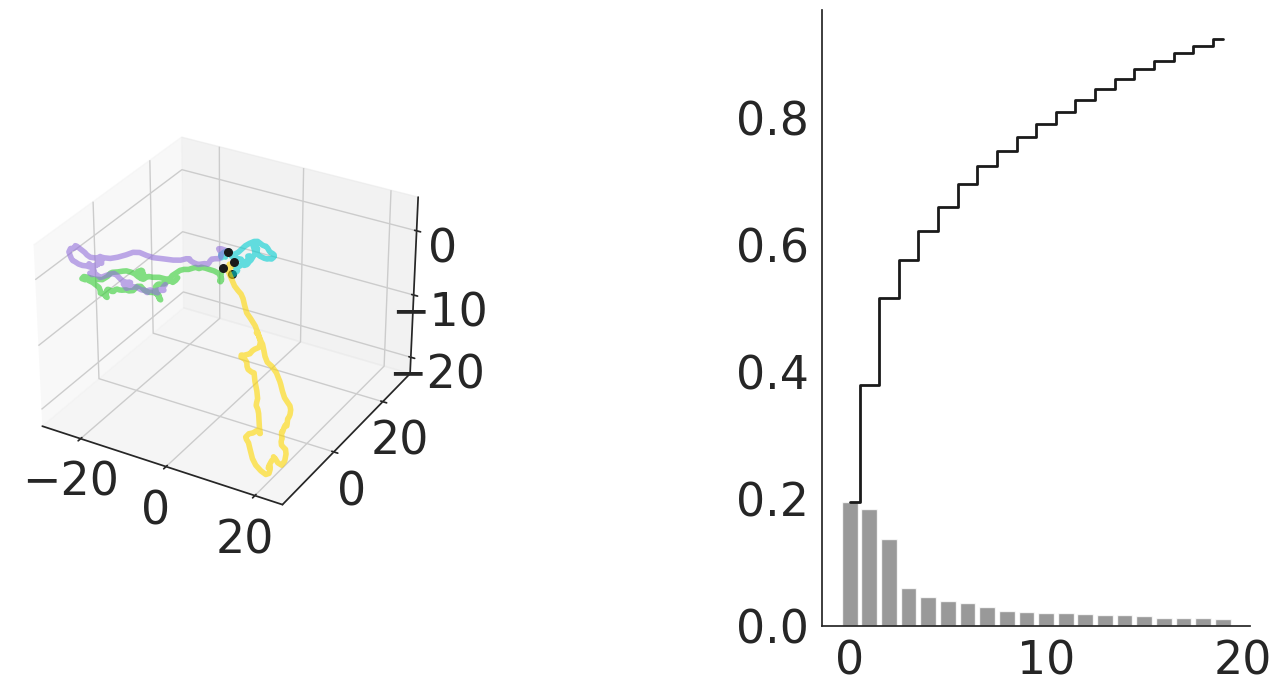

0.05489582937793404
DZ-230503_wk6_f1_schooling (17, 4095)
PCA within brain region DZ-230503_wk6_f1_schooling


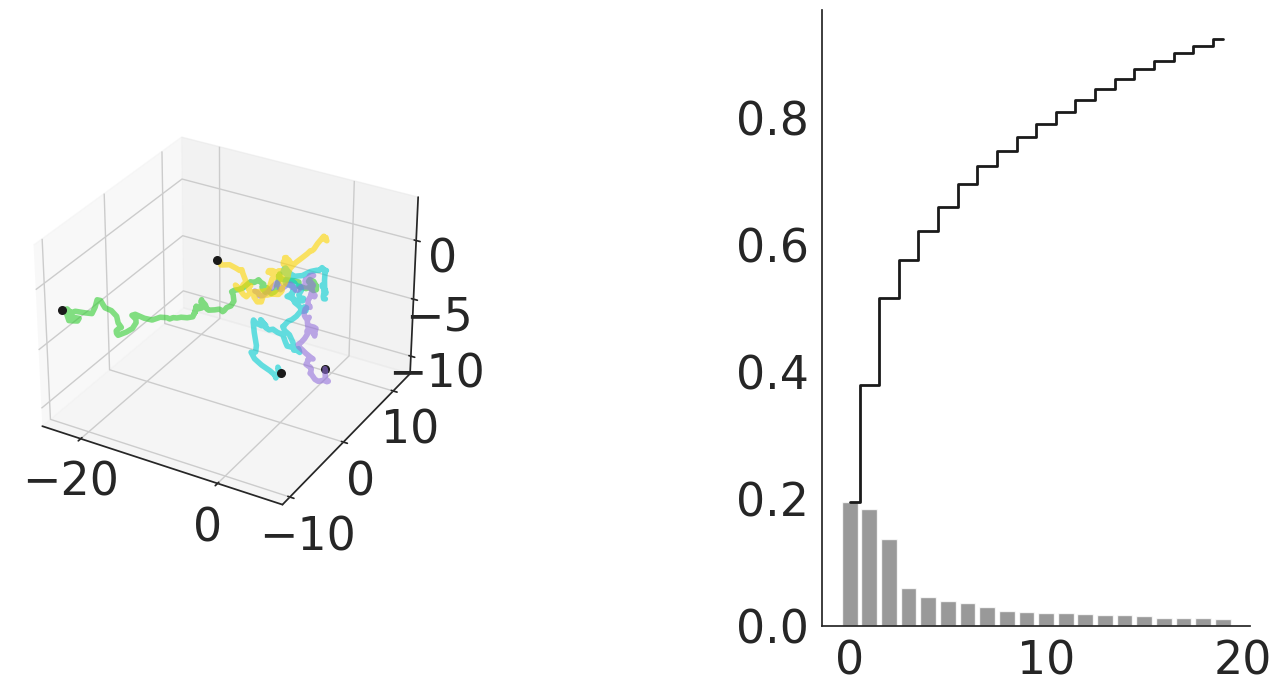

0.09106828648755921
DZ-230525-f1-130_6wk_schooling (41, 3510)
PCA within brain region DZ-230525-f1-130_6wk_schooling


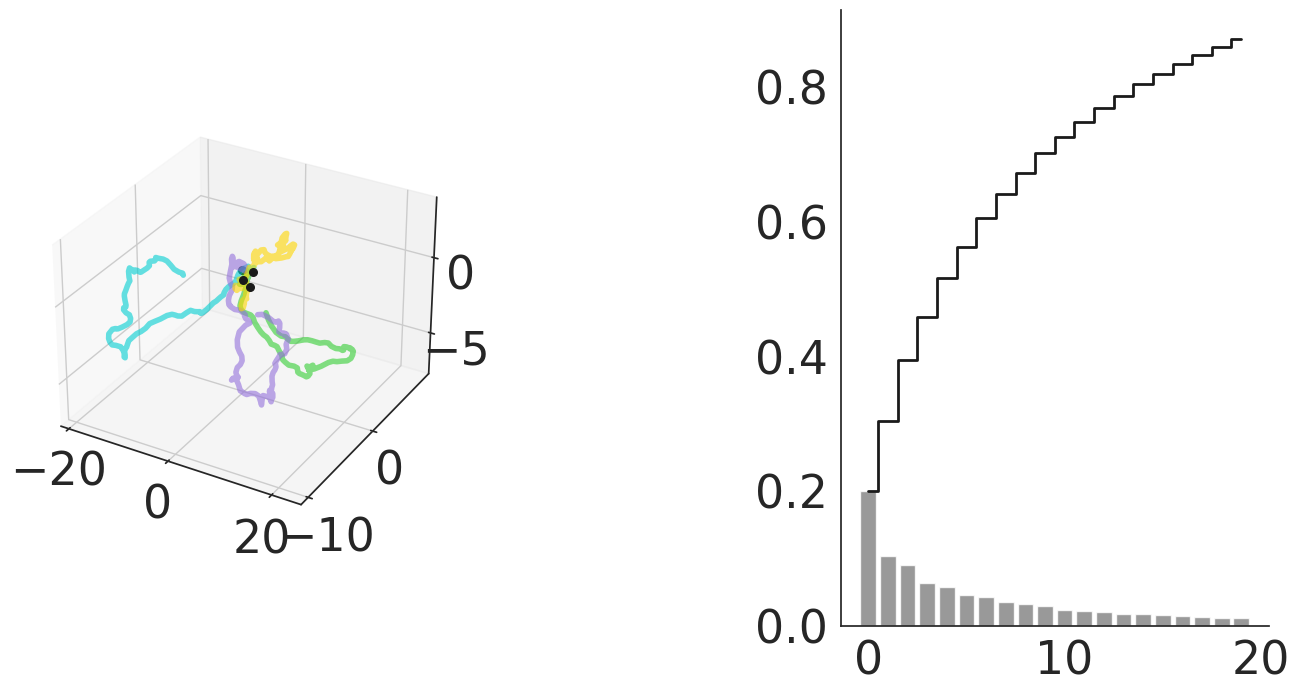

0.10320778861255513
DZ-230521_wk6_f2-140_schooling (101, 4095)
PCA within brain region DZ-230521_wk6_f2-140_schooling


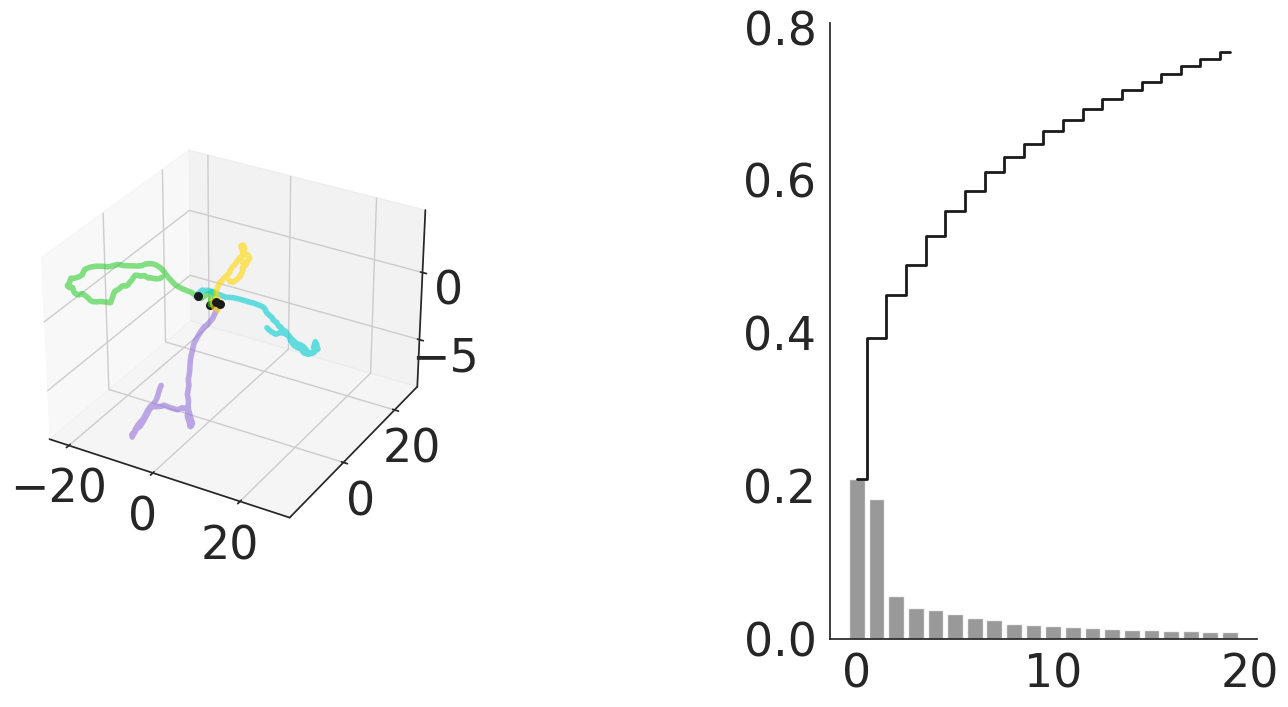

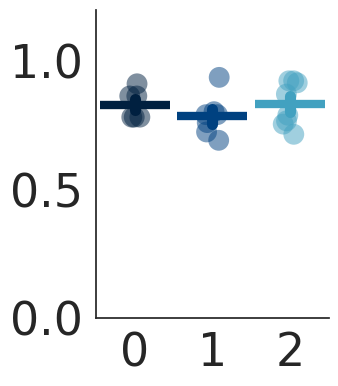

statistics for comparison: one-way ANOVA)
F-statistic:  0.869735478760466 P-value:  0.43594627008692866


In [ ]:
#look at trial-averaged trajectories in PCA space, and ask how they differ between trial types
#Cosine distance with subsampled data

wk2_subjects = [
'DZ-230518_wk2_f1_z-130_schooling',
'DZ-230605-f3-100_2wk_schooling',
'DZ-230605-f5-90_2wk_schooling',
'ml-230427-f4_schooling-3',
'DZ-230517_wk2_f2-2_schooling',
'DZ-230518_wk2_f2-170_schooling']

wk4_subjects=[
'DZ-230503_wk4_f1_schooling',
'DZ-230519_wk4_f1-2_schooling',
'DZ-230523_wk4_f2_-140_schooling',
'DZ-230427_wk4_f1_schooling',
'DZ-230522-f2-120_4wk_schooling',
'DZ-230523_wk4_f1_-110_schooling',
'DZ-230523_wk4_f4_-90_schooling']

wk6_subjects=[
'DZ-230522_wk6_f3_schooling',
'DZ-230522_wk6_f2_schooling',
'DZ-230521_wk6_f4_schooling',
'DZ-230529_wk6_f1_-160_schooling',
'DZ-230524_wk6_f1-3_schooling',
'DZ-230503_wk6_f1_schooling',
'DZ-230525-f1-130_6wk_schooling',
'DZ-230521_wk6_f2-140_schooling']

subjects = wk2_subjects+wk4_subjects+wk6_subjects


resample_Hz = 10 #define common Hz to resample all
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

wk2={}; wk4={}; wk6={}; #summary stats for each age group
for i in ['varexp']: #stimulus comparisons
      wk2[i]=[]; wk4[i]=[]; wk6[i]=[];

for f in subjects:

        path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'

        load = np.load(path+'neuron_details_with-anatomy.npz')
        coords = load['neuron_coordinates']
        xs=[i[0] for i in coords]
        ys=[i[1] for i in coords]
        tr=load['neuron_traces']
        neuron_locations = load['neuron_anatomy']

        load=np.load(path+'linear_model_outputs_ridge.npz', allow_pickle=True)
        pred_scores=load['pred_scores']

        print(np.mean(pred_scores))
        load=np.load(path+'movement_stats.npz', allow_pickle=True)
        tmp=load['time_sec']
        time=[i-tmp[0] for i in tmp]
        new_time_base = int(max(time)*resample_Hz)
        tail_angle=resized(load['angle'],new_time_base)
        turn_array=resized(load['any_turn_array'],new_time_base)
        stimulus=load['stim']

        s0=np.zeros(len(stimulus));
        s1=np.zeros(len(stimulus));
        s2=np.zeros(len(stimulus));
        s3=np.zeros(len(stimulus));
        s4=np.zeros(len(stimulus));

        for ndx,i in enumerate(stimulus):
          if i==0:
            s0[ndx]=1
          if i==1:
            s1[ndx]=1
          if i==2:
            s2[ndx]=1
          if i==3:
            s3[ndx]=1
          if i==4:
            s4[ndx]=1

        #resample all to common Hz, and crop to first X% of behavior
        S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S3=resized(s3,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S4=resized(s4,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]

        #get stimulus onset times
        post_stim_dur=12*resample_Hz   #post-stimulus duration (s)

        S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and resample_Hz < ndx < len(S1)-post_stim_dur]
        S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and resample_Hz < ndx < len(S2)-post_stim_dur]
        S3_ON = [ndx for ndx,i in enumerate(S3) if i>0 and S3[ndx-1]==0 and resample_Hz < ndx < len(S3)-post_stim_dur]
        S4_ON = [ndx for ndx,i in enumerate(S4) if i>0 and S4[ndx-1]==0 and resample_Hz < ndx < len(S4)-post_stim_dur]

        #handle fluorescence traces here
        neuron_traces=[]
        for i,pred,wt in zip(tr,pred_scores,weight_set.T[0]):
          if pred > 0.3:
            tmp = resized(i,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
            kernel_size = int(1.0*resample_Hz) #1.0s
            kernel = np.ones(kernel_size) / kernel_size
            tmp2 = np.convolve(tmp, kernel, mode='smooth') #smooth
            tmp2[:resample_Hz*1]=tmp2[resample_Hz*1] #correcting for edge effects
            tmp2[-resample_Hz*1:]=tmp2[-resample_Hz*1] #correcting for edge effects
            neuron_traces.append(scipy.stats.zscore(tmp2))


        print(f, np.shape(neuron_traces))

        #trajectory in PCA space
        print('PCA within brain region', f)
        N_components=20

        if len(neuron_traces)>N_components:

          #center here (mean-subtract)
          centered_traces =[t-np.mean(t) for t in neuron_traces]

          PCs = {}; tPCs=[]
          pca=PCA(n_components=N_components)
          pca.fit(centered_traces)
          weights = pca.fit_transform(centered_traces)
          explained_variance_ratio = pca.explained_variance_ratio_

          for i in range(N_components):
            PCs["pc"+str(i)] = [m[i]*n for m,n in zip(weights, centered_traces)]
            tpc_tmp = np.mean(PCs["pc"+str(i)], axis=0)
            tPCs.append(tpc_tmp)


        #plot few S of trajectory
        fig = plt.figure(figsize=(16,8))
        plt.tight_layout()
        ax = fig.add_subplot(121, projection='3d')
        ax.scatter(np.mean([tPCs[0][i] for i in S1_ON], axis=0), \
                  np.mean([tPCs[1][i] for i in S1_ON], axis=0), \
                  np.mean([tPCs[2][i] for i in S1_ON], axis=0), \
                  color='k', s=30)
        ax.plot(np.mean([tPCs[0][i:i+post_stim_dur] for i in S1_ON], axis=0), \
                  np.mean([tPCs[1][i:i+post_stim_dur] for i in S1_ON], axis=0), \
                  np.mean([tPCs[2][i:i+post_stim_dur] for i in S1_ON], axis=0), \
                  color='limegreen', linewidth=4.0, alpha=0.6)
        ax.scatter(np.mean([tPCs[0][i] for i in S2_ON], axis=0), \
                  np.mean([tPCs[1][i] for i in S2_ON], axis=0), \
                  np.mean([tPCs[2][i] for i in S2_ON], axis=0), \
                  color='k', s=30)
        ax.plot(np.mean([tPCs[0][i:i+post_stim_dur] for i in S2_ON], axis=0), \
                  np.mean([tPCs[1][i:i+post_stim_dur] for i in S2_ON], axis=0), \
                  np.mean([tPCs[2][i:i+post_stim_dur] for i in S2_ON], axis=0), \
                  color='darkturquoise', linewidth=4.0, alpha=0.6)
        ax.scatter(np.mean([tPCs[0][i] for i in S3_ON], axis=0), \
                  np.mean([tPCs[1][i] for i in S3_ON], axis=0), \
                  np.mean([tPCs[2][i] for i in S3_ON], axis=0), \
                  color='k', s=30)
        ax.plot(np.mean([tPCs[0][i:i+post_stim_dur] for i in S3_ON], axis=0), \
                  np.mean([tPCs[1][i:i+post_stim_dur] for i in S3_ON], axis=0), \
                  np.mean([tPCs[2][i:i+post_stim_dur] for i in S3_ON], axis=0), \
                  color='mediumpurple', linewidth=4.0, alpha=0.6)
        ax.scatter(np.mean([tPCs[0][i] for i in S4_ON], axis=0), \
                  np.mean([tPCs[1][i] for i in S4_ON], axis=0), \
                  np.mean([tPCs[2][i] for i in S4_ON], axis=0), \
                  color='k', s=30)
        ax.plot(np.mean([tPCs[0][i:i+post_stim_dur] for i in S4_ON], axis=0), \
                  np.mean([tPCs[1][i:i+post_stim_dur] for i in S4_ON], axis=0), \
                  np.mean([tPCs[2][i:i+post_stim_dur] for i in S4_ON], axis=0), \
                  color='gold', linewidth=4.0, alpha=0.6)
        #ax.set_xlabel('pc1')
        #ax.set_ylabel('pc2')
        #ax.set_zlabel('pc3')
        #plt.title("3D PCA plot")

        plt.subplot(122)
        cumulative_variance = np.cumsum(explained_variance_ratio)
        plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance', color='0.5')
        plt.step(range(len(cumulative_variance)), cumulative_variance, where='mid', label='Cumulative explained variance', color='k', linewidth=2.0)
        #plt.ylabel('Explained Variance Ratio')
        #plt.xlabel('Principal Components')
        sns.despine()

        plt.subplots_adjust(hspace=0.1, wspace=0.9)
        plt.savefig(figure_savepath+"Populations/wholebrain_"+f+"_PCs.pdf", transparent=True)
        plt.show()


        #plot variance explained
        if f in wk2_subjects:
            wk2['varexp'].append(cumulative_variance)
        if f in wk4_subjects:
            wk4['varexp'].append(cumulative_variance)
        if f in wk6_subjects:
            wk6['varexp'].append(cumulative_variance)


for comparison in ['varexp']:
      summary_data=[]
      plt.figure(figsize=[3,4])
      plt.tight_layout()
      plt.axvline(resample_Hz, color='0.3', linewidth=2.0, alpha=0.5)
      colorz = ['navy','blue','cornflowerblue'] #lighter as older
      for i,color in zip([wk2[comparison],wk4[comparison],wk6[comparison]], colorz):
          summary_data.append([x[-1] for x in i])

      sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
      sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
      #plt.xlabel('ages (2, 4, 6 weeks)')
      #plt.title('variance explained by PCs')
      sns.despine()
      plt.ylim(0,1.2)

      plt.subplots_adjust(hspace=0.1, wspace=0.5)
      plt.savefig(figure_savepath+"Populations/wholebrain_PCA_varianceexplained.pdf", transparent=True)
      plt.show()

      print('statistics for comparison: one-way ANOVA)')
      data = pd.DataFrame({
            'value': np.concatenate(summary_data),
            'group': np.repeat(['wk2', 'wk4', 'wk6'],
                              repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2])])
        })

      # one-way ANOVA
      f_statistic, p_value = stats.f_oneway(summary_data[0], summary_data[1], summary_data[2])
      print("F-statistic: ", f_statistic, "P-value: ", p_value)

      if p_value < 0.05:
          posthoc = sp.posthoc_tukey_hsd(data, val_col='value', group_col='group', p_adjust='bonferroni')
          print(posthoc)




-3.989079673269834
DZ-230518_wk2_f1_z-130_schooling 111 (111, 5135) 0.10531309297912714  of cells
PCA within brain region DZ-230518_wk2_f1_z-130_schooling
-1.541629474634037
DZ-230605-f3-100_2wk_schooling 18 (18, 5187) 0.04568527918781726  of cells
PCA within brain region DZ-230605-f3-100_2wk_schooling
-0.6393658747424295
DZ-230605-f5-90_2wk_schooling 19 (19, 5187) 0.06462585034013606  of cells
PCA within brain region DZ-230605-f5-90_2wk_schooling
-2.902226720662631
ml-230427-f4_schooling-3 42 (42, 4401) 0.045951859956236324  of cells
PCA within brain region ml-230427-f4_schooling-3
-1.1301308220578588
DZ-230517_wk2_f2-2_schooling 155 (155, 5135) 0.14595103578154425  of cells
PCA within brain region DZ-230517_wk2_f2-2_schooling
-1.3493534291250593
DZ-230518_wk2_f2-170_schooling 46 (46, 5135) 0.06774668630338733  of cells
PCA within brain region DZ-230518_wk2_f2-170_schooling
-0.6579120234458165
DZ-230503_wk4_f1_schooling 100 (100, 5187) 0.1763668430335097  of cells
PCA within brain reg

<ipython-input-6-33587f64b8ca>:146: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]


cos dist., PCA space


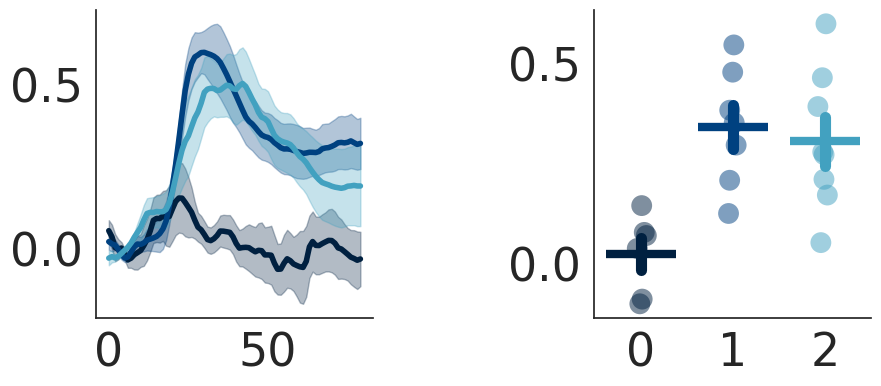

statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  8.942298693965228 P-value:  0.002010387819036915
          wk2       wk4       wk6
wk2  1.000000  0.000901  0.004055
wk4  0.000901  1.000000  0.673094
wk6  0.004055  0.673094  1.000000
group #, N, MEANS, and SEM
0 6 0.02501426252472978 0.03988500395411834
normality test is ShapiroResult(statistic=0.8953830599784851, pvalue=0.3473590612411499)
1 7 0.341696046860076 0.055268077808660124
normality test is ShapiroResult(statistic=0.9844755530357361, pvalue=0.9783571362495422)
2 8 0.30563475686278896 0.061310058359007866
normality test is ShapiroResult(statistic=0.9800953269004822, pvalue=0.9633744359016418)
cos dist., PCA space


<ipython-input-6-33587f64b8ca>:146: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]


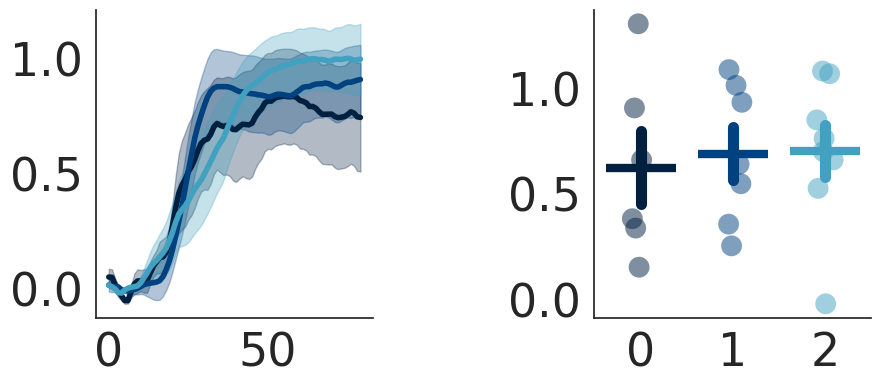

statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  0.08822165835656733 P-value:  0.915951309651497
group #, N, MEANS, and SEM
0 6 0.6258513535586383 0.17446148342402004
normality test is ShapiroResult(statistic=0.9432158470153809, pvalue=0.6852032542228699)
1 7 0.6923798339119508 0.12448870794678045
normality test is ShapiroResult(statistic=0.9250491857528687, pvalue=0.5096240043640137)
2 8 0.7054775633955036 0.12422298561425679
normality test is ShapiroResult(statistic=0.8918179869651794, pvalue=0.24329794943332672)


In [ ]:
#look at trial-averaged trajectories in PCA space, and ask how they differ between trial types
#Cosine distance

#subjects from above


resample_Hz = 10 #define common Hz to resample all
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

wk2={}; wk4={}; wk6={}; #summary stats for each age group
for i in ['all_obj','obj-v-drift']: #stimulus comparisons
      wk2[i]=[]; wk4[i]=[]; wk6[i]=[];

for f in subjects:

        path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'

        load = np.load(path+'neuron_details_with-anatomy.npz')
        coords = load['neuron_coordinates']
        xs=[i[0] for i in coords]
        ys=[i[1] for i in coords]
        tra=load['neuron_traces']
        neuron_locations = load['neuron_anatomy']

        load=np.load(path+'linear_model_outputs_ridge.npz', allow_pickle=True)
        pred_scores=load['pred_scores']

        print(np.mean(pred_scores))

        load=np.load(path+'movement_stats.npz', allow_pickle=True)
        tmp=load['time_sec']
        time=[i-tmp[0] for i in tmp]
        new_time_base = int(max(time)*resample_Hz)
        tail_angle=resized(load['angle'],new_time_base)
        turn_array=resized(load['any_turn_array'],new_time_base)
        stimulus=load['stim']

        s0=np.zeros(len(stimulus));
        s1=np.zeros(len(stimulus));
        s2=np.zeros(len(stimulus));
        s3=np.zeros(len(stimulus));
        s4=np.zeros(len(stimulus));

        for ndx,i in enumerate(stimulus):
          if i==0:
            s0[ndx]=1
          if i==1:
            s1[ndx]=1
          if i==2:
            s2[ndx]=1
          if i==3:
            s3[ndx]=1
          if i==4:
            s4[ndx]=1

        #resample all to common Hz, and crop to first X% of behavior
        S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S3=resized(s3,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S4=resized(s4,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]

        #get stimulus onset times
        post_stim_dur=7*resample_Hz   #post-stimulus duration (s)

        S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and resample_Hz < ndx < len(S1)-post_stim_dur]
        S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and resample_Hz < ndx < len(S2)-post_stim_dur]
        S3_ON = [ndx for ndx,i in enumerate(S3) if i>0 and S3[ndx-1]==0 and resample_Hz < ndx < len(S3)-post_stim_dur]
        S4_ON = [ndx for ndx,i in enumerate(S4) if i>0 and S4[ndx-1]==0 and resample_Hz < ndx < len(S4)-post_stim_dur]

        #handle fluorescence traces here
        neuron_traces=[]
        for i,pred in zip(tra,pred_scores):
          if pred > 0:
            tmp = resized(i,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
            kernel_size = int(1.0*resample_Hz) #1.0s
            kernel = np.ones(kernel_size) / kernel_size
            tmp2 = np.convolve(tmp, kernel, mode='smooth') #smooth
            tmp2[:resample_Hz*1]=tmp2[resample_Hz*1] #correcting for edge effects
            tmp2[-resample_Hz*1:]=tmp2[-resample_Hz*1] #correcting for edge effects
            neuron_traces.append(scipy.stats.zscore(tmp2))

        print(f, len(neuron_traces), np.shape(neuron_traces), len(neuron_traces)/len(tra), " of cells")

        #trajectory in PCA space
        print('PCA within brain region', f)
        N_components=10

        if len(neuron_traces)>N_components:

          #center here (mean-subtract)
          centered_traces = [t-np.mean(t) for t in neuron_traces]

          PCs = {}; tPCs=[]
          pca=PCA(n_components=N_components)
          pca.fit(centered_traces)
          weights = pca.fit_transform(centered_traces)
          explained_variance_ratio = pca.explained_variance_ratio_

          for i in range(N_components): #using first 10 components (of N_components)
            PCs["pc"+str(i)] = [m[i]*n for m,n in zip(weights, centered_traces)]
            tpc_tmp = np.mean(PCs["pc"+str(i)], axis=0)
            tPCs.append(tpc_tmp)

          #plot cosine distance
          s1_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S1_ON], axis=0) for t in tPCs])
          s2_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S2_ON], axis=0) for t in tPCs])
          s3_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S3_ON], axis=0) for t in tPCs])
          s4_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S4_ON], axis=0) for t in tPCs])

          if f in wk2_subjects:
            wk2['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='cosine')],axis=0))
            wk2['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='cosine')],axis=0))
          if f in wk4_subjects:
            wk4['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='cosine')],axis=0))
            wk4['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='cosine')],axis=0))
          if f in wk6_subjects:
            wk6['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='cosine')],axis=0))
            wk6['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='cosine')],axis=0))


#for comparison in ['s1-v-s2','s1-v-s3','s1-v-s4','s2-v-s3','s2-v-s4','s3-v-s4','all_obj']:
for comparison in ['all_obj', 'obj-v-drift']:

      plt.figure(figsize=[10,4])
      plt.tight_layout()
      plt.subplot(121)
      #plt.axvline(resample_Hz, color='0.3', linewidth=2.0, alpha=0.5)
      colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]

      summary_data=[]
      for i,color in zip([wk2[comparison],wk4[comparison],wk6[comparison]], colorz):

          i = [x-np.mean(x[:resample_Hz]) for x in i] #baseline subtraction

          summary_data.append([np.mean(x[resample_Hz:]) for x in i])

          plt.plot(np.mean(i, axis = 0), color = color, linewidth=4)
          plt.fill_between(np.arange(np.mean(i, axis=0).shape[0]),
            np.mean(i, axis=0)+scipy.stats.sem(i, axis= 0),
            np.mean(i, axis=0)-scipy.stats.sem(i, axis=0), color=color, alpha=0.3)
          #plt.ylim(0,35)
      #plt.title("cos dist. in PC space for comparison "+comparison)
      sns.despine()


      plt.subplot(122)

      summary_data=[]
      for i,color in zip([wk2[comparison],wk4[comparison],wk6[comparison]], colorz):

          i = [x-np.mean(x[:resample_Hz]) for x in i] #baseline subtraction

          summary_data.append([np.mean(x[resample_Hz:]) for x in i]) #mean in _ s post stimulus

      sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
      sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
      #plt.xlabel('ages (2, 4, 6 weeks)')
      print('cos dist., PCA space')
      sns.despine()

      plt.subplots_adjust(hspace=0.1, wspace=0.8)
      plt.savefig(figure_savepath+"Populations/wholebrain_summary_PC_space_"+comparison+"_cos.pdf", transparent=True)
      plt.show()

      print('statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)')
      data = pd.DataFrame({
            'value': np.concatenate(summary_data),
            'group': np.repeat(['wk2', 'wk4', 'wk6'],
                              repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2])])
        })

      # one-way ANOVA
      f_statistic, p_value = stats.f_oneway(summary_data[0], summary_data[1], summary_data[2])
      print("F-statistic: ", f_statistic, "P-value: ", p_value)

      # If p-value < 0.05, we can perform post hoc test (ttest)
      if p_value < 0.05:
          posthoc = sp.posthoc_ttest(data, val_col='value', group_col='group')
          print(posthoc)

      print("group #, N, MEANS, and SEM")
      for ndx,i in enumerate(summary_data):
        print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
        print('normality test is', scipy.stats.shapiro(i))


-3.989079673269834
DZ-230518_wk2_f1_z-130_schooling 111 (111, 5135) 0.10531309297912714  of cells
PCA within brain region DZ-230518_wk2_f1_z-130_schooling
-1.541629474634037
DZ-230605-f3-100_2wk_schooling 18 (18, 5187) 0.04568527918781726  of cells
PCA within brain region DZ-230605-f3-100_2wk_schooling
-0.6393658747424295
DZ-230605-f5-90_2wk_schooling 19 (19, 5187) 0.06462585034013606  of cells
PCA within brain region DZ-230605-f5-90_2wk_schooling
-2.902226720662631
ml-230427-f4_schooling-3 42 (42, 4401) 0.045951859956236324  of cells
PCA within brain region ml-230427-f4_schooling-3
-1.1301308220578588
DZ-230517_wk2_f2-2_schooling 155 (155, 5135) 0.14595103578154425  of cells
PCA within brain region DZ-230517_wk2_f2-2_schooling
-1.3493534291250593
DZ-230518_wk2_f2-170_schooling 46 (46, 5135) 0.06774668630338733  of cells
PCA within brain region DZ-230518_wk2_f2-170_schooling
-0.6579120234458165
DZ-230503_wk4_f1_schooling 100 (100, 5187) 0.1763668430335097  of cells
PCA within brain reg

<ipython-input-10-5af8bb3f945e>:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]


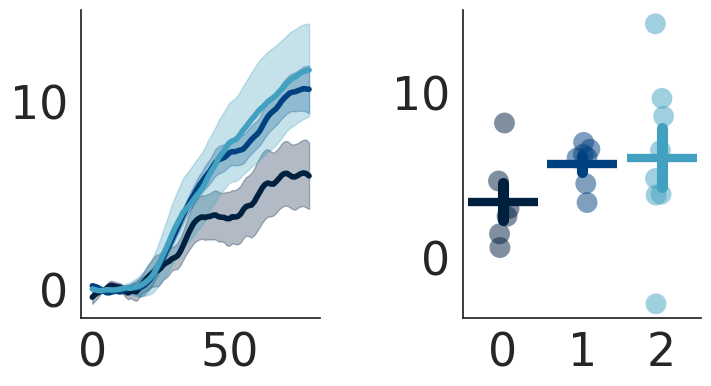

statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  1.1030459100206398 P-value:  0.35327397615766193
group #, N, MEANS, and SEM
0 6 3.4051102583034463 1.104521664761112
normality test is ShapiroResult(statistic=0.9127964377403259, pvalue=0.4550476372241974)
1 7 5.689256595267433 0.4881328553804516
normality test is ShapiroResult(statistic=0.8588349223136902, pvalue=0.14779061079025269)
2 8 6.072201542817958 1.7646573454756633
normality test is ShapiroResult(statistic=0.9707366824150085, pvalue=0.9037258625030518)


<ipython-input-10-5af8bb3f945e>:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]


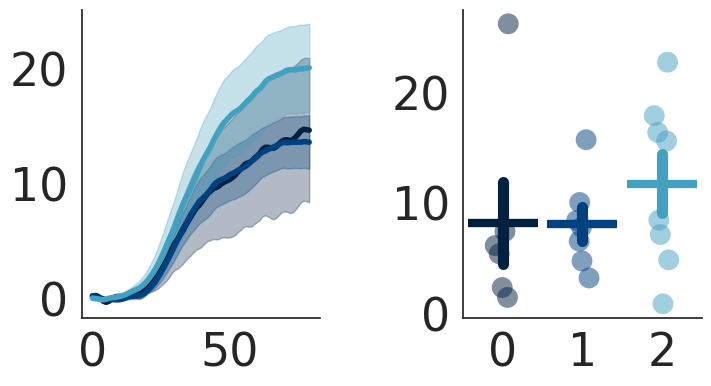

statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  0.6457480069612572 P-value:  0.5359933209775546
group #, N, MEANS, and SEM
0 6 8.190468277196782 3.734900110493205
normality test is ShapiroResult(statistic=0.7274343371391296, pvalue=0.011873696930706501)
1 7 8.096990404111695 1.5428121637855114
normality test is ShapiroResult(statistic=0.9375274777412415, pvalue=0.6165603995323181)
2 8 11.776088325262133 2.653947178102568
normality test is ShapiroResult(statistic=0.9557667970657349, pvalue=0.7689504027366638)


In [ ]:
#look at trial-averaged trajectories in PCA space, and ask how they differ between trial types
#euclidean distance


resample_Hz = 10 #define common Hz to resample all
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

wk2={}; wk4={}; wk6={}; #summary stats for each age group
for i in ['all_obj','obj-v-drift']: #stimulus comparisons
      wk2[i]=[]; wk4[i]=[]; wk6[i]=[];

for f in subjects:

        path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'

        load = np.load(path+'neuron_details_with-anatomy.npz')
        coords = load['neuron_coordinates']
        xs=[i[0] for i in coords]
        ys=[i[1] for i in coords]
        tra=load['neuron_traces']
        neuron_locations = load['neuron_anatomy']

        load=np.load(path+'linear_model_outputs_ridge.npz', allow_pickle=True)
        pred_scores=load['pred_scores']

        print(np.mean(pred_scores))

        load=np.load(path+'movement_stats.npz', allow_pickle=True)
        tmp=load['time_sec']
        time=[i-tmp[0] for i in tmp]
        new_time_base = int(max(time)*resample_Hz)
        tail_angle=resized(load['angle'],new_time_base)
        turn_array=resized(load['any_turn_array'],new_time_base)
        stimulus=load['stim']

        s0=np.zeros(len(stimulus));
        s1=np.zeros(len(stimulus));
        s2=np.zeros(len(stimulus));
        s3=np.zeros(len(stimulus));
        s4=np.zeros(len(stimulus));

        for ndx,i in enumerate(stimulus):
          if i==0:
            s0[ndx]=1
          if i==1:
            s1[ndx]=1
          if i==2:
            s2[ndx]=1
          if i==3:
            s3[ndx]=1
          if i==4:
            s4[ndx]=1

        #resample all to common Hz, and crop to first X% of behavior
        S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S3=resized(s3,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S4=resized(s4,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]

        #get stimulus onset times
        post_stim_dur=7*resample_Hz   #post-stimulus duration (s)

        S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and resample_Hz < ndx < len(S1)-post_stim_dur]
        S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and resample_Hz < ndx < len(S2)-post_stim_dur]
        S3_ON = [ndx for ndx,i in enumerate(S3) if i>0 and S3[ndx-1]==0 and resample_Hz < ndx < len(S3)-post_stim_dur]
        S4_ON = [ndx for ndx,i in enumerate(S4) if i>0 and S4[ndx-1]==0 and resample_Hz < ndx < len(S4)-post_stim_dur]

        #handle fluorescence traces here
        neuron_traces=[]
        for i,pred in zip(tra,pred_scores):
          if pred > 0:
            tmp = resized(i,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
            kernel_size = int(1.0*resample_Hz) #1.0s
            kernel = np.ones(kernel_size) / kernel_size
            tmp2 = np.convolve(tmp, kernel, mode='smooth') #smooth
            tmp2[:resample_Hz*1]=tmp2[resample_Hz*1] #correcting for edge effects
            tmp2[-resample_Hz*1:]=tmp2[-resample_Hz*1] #correcting for edge effects
            neuron_traces.append(scipy.stats.zscore(tmp2))

        print(f, len(neuron_traces), np.shape(neuron_traces), len(neuron_traces)/len(tra), " of cells")

        #trajectory in PCA space
        print('PCA within brain region', f)
        N_components=10

        if len(neuron_traces)>N_components:

          #center here (mean-subtract)
          centered_traces = [t-np.mean(t) for t in neuron_traces]

          PCs = {}; tPCs=[]
          pca=PCA(n_components=N_components)
          pca.fit(centered_traces)
          weights = pca.fit_transform(centered_traces)
          explained_variance_ratio = pca.explained_variance_ratio_

          for i in range(N_components): #using first 10 components (of N_components)
            PCs["pc"+str(i)] = [m[i]*n for m,n in zip(weights, centered_traces)]
            tpc_tmp = np.mean(PCs["pc"+str(i)], axis=0)
            tPCs.append(tpc_tmp)

          #plot cosine distance
          s1_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S1_ON], axis=0) for t in tPCs])
          s2_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S2_ON], axis=0) for t in tPCs])
          s3_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S3_ON], axis=0) for t in tPCs])
          s4_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S4_ON], axis=0) for t in tPCs])

          if f in wk2_subjects:
            wk2['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='euclidean')],axis=0))
            wk2['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='euclidean')],axis=0))
          if f in wk4_subjects:
            wk4['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='euclidean')],axis=0))
            wk4['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='euclidean')],axis=0))
          if f in wk6_subjects:
            wk6['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='euclidean')],axis=0))
            wk6['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='euclidean'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='euclidean')],axis=0))


#for comparison in ['s1-v-s2','s1-v-s3','s1-v-s4','s2-v-s3','s2-v-s4','s3-v-s4','all_obj']:
for comparison in ['all_obj', 'obj-v-drift']:

      plt.figure(figsize=[8,4])
      plt.tight_layout()
      plt.subplot(121)
      #plt.axvline(resample_Hz, color='0.3', linewidth=2.0, alpha=0.5)
      colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]

      summary_data=[]
      for i,color in zip([wk2[comparison],wk4[comparison],wk6[comparison]], colorz):

          i = [x-np.mean(x[:resample_Hz]) for x in i] #baseline subtraction

          summary_data.append([np.mean(x[resample_Hz:]) for x in i])

          plt.plot(np.mean(i, axis = 0), color = color, linewidth=4)
          plt.fill_between(np.arange(np.mean(i, axis=0).shape[0]),
            np.mean(i, axis=0)+scipy.stats.sem(i, axis= 0),
            np.mean(i, axis=0)-scipy.stats.sem(i, axis=0), color=color, alpha=0.3)
          #plt.ylim(0,35)
      #plt.title("euc dist. in PC space for comparison "+comparison)
      sns.despine()


      plt.subplot(122)

      summary_data=[]
      for i,color in zip([wk2[comparison],wk4[comparison],wk6[comparison]], colorz):

          i = [x-np.mean(x[:resample_Hz]) for x in i] #baseline subtraction

          summary_data.append([np.mean(x[resample_Hz:]) for x in i]) #mean in _ s post stimulus

      sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
      sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
      #plt.xlabel('ages (2, 4, 6 weeks)')
      #plt.title('cos dist., PCA space')
      sns.despine()

      plt.subplots_adjust(hspace=0.1, wspace=0.6)
      plt.savefig(figure_savepath+"Populations/wholebrain_summary_PC_space_"+comparison+"_euc.pdf", transparent=True)
      plt.show()

      print('statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)')
      data = pd.DataFrame({
            'value': np.concatenate(summary_data),
            'group': np.repeat(['wk2', 'wk4', 'wk6'],
                              repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2])])
        })

      # one-way ANOVA
      f_statistic, p_value = stats.f_oneway(summary_data[0], summary_data[1], summary_data[2])
      print("F-statistic: ", f_statistic, "P-value: ", p_value)

      # If p-value < 0.05, we can perform post hoc test (ttest)
      if p_value < 0.05:
          posthoc = sp.posthoc_ttest(data, val_col='value', group_col='group')
          print(posthoc)

      print("group #, N, MEANS, and SEM")
      for ndx,i in enumerate(summary_data):
        print(ndx, len(i), np.mean(i), scipy.stats.sem(i))
        print('normality test is', scipy.stats.shapiro(i))


DZ-230518_wk2_f1_z-130_schooling 111 50
below cutoff
DZ-230605-f3-100_2wk_schooling 18 18
below cutoff
DZ-230605-f5-90_2wk_schooling 19 19
below cutoff
ml-230427-f4_schooling-3 42 42
DZ-230517_wk2_f2-2_schooling 155 50
below cutoff
DZ-230518_wk2_f2-170_schooling 46 46
DZ-230503_wk4_f1_schooling 100 50
DZ-230519_wk4_f1-2_schooling 95 50
DZ-230523_wk4_f2_-140_schooling 447 50
below cutoff
DZ-230427_wk4_f1_schooling 32 32
DZ-230522-f2-120_4wk_schooling 244 50
DZ-230523_wk4_f1_-110_schooling 298 50
DZ-230523_wk4_f4_-90_schooling 314 50
below cutoff
DZ-230522_wk6_f3_schooling 40 40
DZ-230522_wk6_f2_schooling 167 50
DZ-230521_wk6_f4_schooling 134 50
DZ-230529_wk6_f1_-160_schooling 293 50
DZ-230524_wk6_f1-3_schooling 138 50
DZ-230503_wk6_f1_schooling 56 50
DZ-230525-f1-130_6wk_schooling 121 50
DZ-230521_wk6_f2-140_schooling 275 50


<ipython-input-15-08a4f0e2f2ed>:198: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]


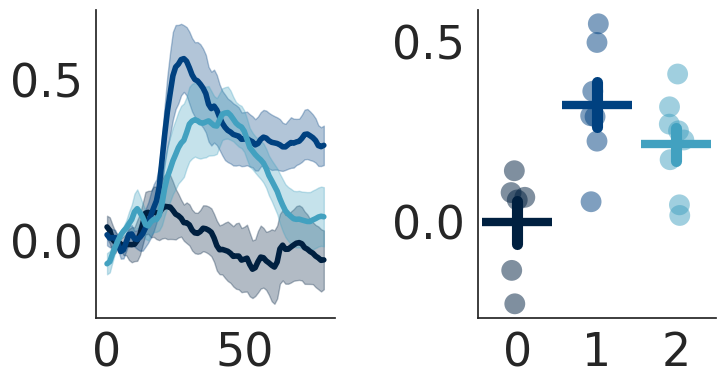

statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  8.06914229420402 P-value:  0.0031497587814239554
          wk2       wk4       wk6
wk2  1.000000  0.003264  0.013070
wk4  0.003264  1.000000  0.176193
wk6  0.013070  0.176193  1.000000


<ipython-input-15-08a4f0e2f2ed>:198: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]


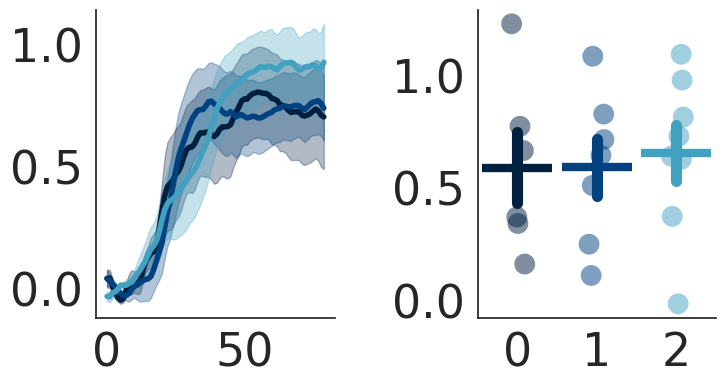

statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)
F-statistic:  0.08094637097909443 P-value:  0.9225769226831755


In [ ]:
#look at trial-averaged trajectories in PCA space, and ask how they differ between trial types
##Cosine distance with subsampled data


resample_Hz = 10 #define common Hz to resample all
ts_fraction = [0.05,1.0] #fraction of full timeseries to use

wk2={}; wk4={}; wk6={}; #summary stats for each age group
for i in ['all_obj','obj-v-drift']: #stimulus comparisons
      wk2[i]=[]; wk4[i]=[]; wk6[i]=[];

for f in subjects:

        path = '/content/drive/MyDrive/Zada_Schulze_paper/Imaging_data/Schooling/'+f+'/'

        load = np.load(path+'neuron_details_with-anatomy.npz')
        coords = load['neuron_coordinates']
        xs=[i[0] for i in coords]
        ys=[i[1] for i in coords]
        tr=load['neuron_traces']
        neuron_locations = load['neuron_anatomy']

        load=np.load(path+'linear_model_outputs_ridge.npz', allow_pickle=True)
        pred_scores=load['pred_scores']
        weight_set=load['weight_set']

        load=np.load(path+'movement_stats.npz', allow_pickle=True)
        tmp=load['time_sec']
        time=[i-tmp[0] for i in tmp]
        new_time_base = int(max(time)*resample_Hz)
        tail_angle=resized(load['angle'],new_time_base)
        turn_array=resized(load['any_turn_array'],new_time_base)
        stimulus=load['stim']

        s0=np.zeros(len(stimulus));
        s1=np.zeros(len(stimulus));
        s2=np.zeros(len(stimulus));
        s3=np.zeros(len(stimulus));
        s4=np.zeros(len(stimulus));

        for ndx,i in enumerate(stimulus):
          if i==0:
            s0[ndx]=1
          if i==1:
            s1[ndx]=1
          if i==2:
            s2[ndx]=1
          if i==3:
            s3[ndx]=1
          if i==4:
            s4[ndx]=1

        #resample all to common Hz, and crop to first X% of behavior
        S1=resized(s1,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S2=resized(s2,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S3=resized(s3,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
        S4=resized(s4,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]

        #get stimulus onset times
        post_stim_dur=7*resample_Hz   #post-stimulus duration (s)

        S1_ON = [ndx for ndx,i in enumerate(S1) if i>0 and S1[ndx-1]==0 and resample_Hz < ndx < len(S1)-post_stim_dur]
        S2_ON = [ndx for ndx,i in enumerate(S2) if i>0 and S2[ndx-1]==0 and resample_Hz < ndx < len(S2)-post_stim_dur]
        S3_ON = [ndx for ndx,i in enumerate(S3) if i>0 and S3[ndx-1]==0 and resample_Hz < ndx < len(S3)-post_stim_dur]
        S4_ON = [ndx for ndx,i in enumerate(S4) if i>0 and S4[ndx-1]==0 and resample_Hz < ndx < len(S4)-post_stim_dur]

        #handle fluorescence traces here
        neuron_traces=[]
        for i,pred,wt in zip(tr,pred_scores,weight_set.T[0]):
          if pred > 0:
            tmp = resized(i,new_time_base)[int(new_time_base*ts_fraction[0]):int(new_time_base*ts_fraction[1])]
            kernel_size = int(1.0*resample_Hz) #1s
            kernel = np.ones(kernel_size) / kernel_size
            tmp3 = np.convolve(tmp, kernel, mode='smooth') #smooth
            neuron_traces.append(scipy.stats.zscore(tmp3)) #append zscore

        if len(neuron_traces)>50:
          neuron_traces_subsample = random.sample(neuron_traces, 50)
        else:
          neuron_traces_subsample = neuron_traces
          print("below cutoff")

        print(f, len(neuron_traces), len(neuron_traces_subsample))

        #trajectory in PCA space
        #print('PCA within brain region', f)
        N_components=10

        if len(neuron_traces_subsample)>N_components:

          #center here (mean-subtract)
          centered_traces =[t-np.mean(t) for t in neuron_traces_subsample]

          PCs = {}; tPCs=[]
          pca=PCA(n_components=N_components)
          pca.fit(centered_traces)
          weights = pca.fit_transform(centered_traces)
          explained_variance_ratio = pca.explained_variance_ratio_

          for i in range(N_components):
            PCs["pc"+str(i)] = [m[i]*n for m,n in zip(weights, centered_traces)]
            tpc_tmp = np.mean(PCs["pc"+str(i)], axis=0)
            tPCs.append(tpc_tmp)


          #plot cosine distance
          s1_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S1_ON], axis=0) for t in tPCs])
          s2_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S2_ON], axis=0) for t in tPCs])
          s3_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S3_ON], axis=0) for t in tPCs])
          s4_pca = np.array([np.mean([t[i-resample_Hz:i+post_stim_dur] for i in S4_ON], axis=0) for t in tPCs])

          if f in wk2_subjects:
            wk2['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='cosine')],axis=0))
            wk2['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='cosine')],axis=0))
          if f in wk4_subjects:
            wk4['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='cosine')],axis=0))
            wk4['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='cosine')],axis=0))
          if f in wk6_subjects:
            wk6['all_obj'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s2_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s1_pca.T, s3_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s3_pca.T, metric='cosine')],axis=0))
            wk6['obj-v-drift'].append(np.mean([sklearn.metrics.pairwise.paired_distances(s1_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s2_pca.T, s4_pca.T, metric='cosine'),
                                           sklearn.metrics.pairwise.paired_distances(s3_pca.T, s4_pca.T, metric='cosine')],axis=0))


#for comparison in ['s1-v-s2','s1-v-s3','s1-v-s4','s2-v-s3','s2-v-s4','s3-v-s4','all_obj']:
for comparison in ['all_obj', 'obj-v-drift']:
      summary_data=[]
      plt.figure(figsize=[8,4])
      plt.tight_layout()
      plt.subplot(121)
      #plt.axvline(resample_Hz, color='0.3', linewidth=2.0, alpha=0.5)
      colorz = [plt.cm.get_cmap('ocean')(0.25), plt.cm.get_cmap('ocean')(0.5), plt.cm.get_cmap('ocean')(0.75)]
      for i,color in zip([wk2[comparison],wk4[comparison],wk6[comparison]], colorz):

          i = [x-np.mean(x[:resample_Hz]) for x in i] #baseline subtraction

          summary_data.append([np.mean(x[resample_Hz:]) for x in i])

          plt.plot(np.mean(i, axis = 0), color = color, linewidth=4)
          plt.fill_between(np.arange(np.mean(i, axis=0).shape[0]),
            np.mean(i, axis=0)+scipy.stats.sem(i, axis= 0),
            np.mean(i, axis=0)-scipy.stats.sem(i, axis=0), color=color, alpha=0.3)
          #plt.ylim(0,35)
      #plt.title("cos dist. in PC space for comparison "+comparison)
      sns.despine()

      plt.subplot(122)
      sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='ocean', linestyle='none')
      sns.stripplot(data=summary_data, s=15, palette='ocean', jitter=True, alpha=0.5)
      #plt.xlabel('ages (2, 4, 6 weeks)')
      #plt.title('cos dist., PCA space')
      sns.despine()

      plt.subplots_adjust(hspace=0.1, wspace=0.6)
      plt.savefig(figure_savepath+"Populations/wholebrain_summary_PC_space_"+comparison+"_subsampleto40.pdf", transparent=True)
      plt.show()

      print('statistics for comparison: one-way ANOVA  with posthoc Dunns comparison (bonferroni corrected)')
      data = pd.DataFrame({
            'value': np.concatenate(summary_data),
            'group': np.repeat(['wk2', 'wk4', 'wk6'],
                              repeats=[len(summary_data[0]), len(summary_data[1]), len(summary_data[2])])
        })

      # one-way ANOVA
      f_statistic, p_value = stats.f_oneway(summary_data[0], summary_data[1], summary_data[2])
      print("F-statistic: ", f_statistic, "P-value: ", p_value)

      # If p-value < 0.05, we can perform post hoc test (Tukey)
      if p_value < 0.05:
          posthoc = sp.posthoc_ttest(data, val_col='value', group_col='group')
          print(posthoc)
